#**Exploratory Data Analysis**

*   Reviewing the provided digital marketing dataset to familiarise with the variables and their structure.

* Checking the data quality, missing values, and potential errors.

* Determining if any data pre-processing is necessary or not

*   Analyze the distribution of the variables to identify any outliers or anomalies.

*   Investigate the relationship between variables to identify any correlations or patterns.

* Visualize the data to gain insights into the behavior and characteristics of the customers.


In [ ]:
#Installing the packages and importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
pd.options.display.float_format = '{:.2f}'.format

!pip install imblearn
from imblearn.over_sampling import SMOTE

!pip install scikit-learn

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

!pip install catboost
from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

from sklearn import model_selection

!pip install shap
import shap

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)  # Imports metrics for evaluating model performance.

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.8 MB/s eta 0:00:00


### **Understanding the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading CSV using Pandas and storing in dataframe
df = pd.read_csv('/content/drive/MyDrive/Dissertation/DigitalMarketingAnalytics_Dissertation/digital_marketing_campaign_dataset.csv')
display(df)

CustomerID  Age  Gender  Income CampaignChannel   CampaignType  AdSpend  \
0           8000   56  Female  136912    Social Media      Awareness  6497.87   
1           8001   69    Male   41760           Email      Retention  3898.67   
2           8002   46  Female   88456             PPC      Awareness  1546.43   
3           8003   32  Female   44085             PPC     Conversion   539.53   
4           8004   60  Female   83964             PPC     Conversion  1678.04   
...          ...  ...     ...     ...             ...            ...      ...   
7995       15995   21    Male   24849           Email      Awareness  8518.31   
7996       15996   43  Female   44718             SEO      Retention  1424.61   
7997       15997   28  Female  125471        Referral  Consideration  4609.53   
7998       15998   19  Female  107862             PPC  Consideration  9476.11   
7999       15999   31  Female   93002           Email      Awareness  7743.63   

      ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  \
0                 0.04            0.09              0           2.40   
1                 0.16            0.18             42           2.92   
2                 0.28            0.08              2           8.22   
3                 0.14            0.09             47           4.54   
4                 0.25            0.11              0           2.05   
...                ...             ...            ...            ...   
7995              0.24            0.12             23           9.69   
7996              0.24            0.19             49           9.50   
7997              0.06            0.13             35           2.85   
7998              0.02            0.14             49           1.00   
7999              0.19            0.06             15           6.96   

      TimeOnSite  SocialShares  EmailOpens  EmailClicks  PreviousPurchases  \
0           7.40            19           6            9                  4   
1           5.35             5           2            7                  2   
2          13.79             0          11            2                  8   
3          14.69            89           2            2                  0   
4          13.99             6           6            6                  8   
...          ...           ...         ...          ...                ...   
7995       14.23            70          13            6                  7   
7996        3.50            52          13            1                  5   
7997       14.62            38          16            0                  3   
7998        3.88            86           1            5                  7   
7999       12.76             2          18            9                  9   

      LoyaltyPoints AdvertisingPlatform AdvertisingTool  Conversion  
0               688            IsConfid      ToolConfid           1  
1              3459            IsConfid      ToolConfid           1  
2              2337            IsConfid      ToolConfid           1  
3              2463            IsConfid      ToolConfid           1  
4              4345            IsConfid      ToolConfid           1  
...             ...                 ...             ...         ...  
7995            286            IsConfid      ToolConfid           0  
7996           1502            IsConfid      ToolConfid           0  
7997            738            IsConfid      ToolConfid           1  
7998           2709            IsConfid      ToolConfid           1  
7999            341            IsConfid      ToolConfid           0  

[8000 rows x 20 columns]

In [ ]:
#Top 10 rows of the dataframe
df.head(10)

CustomerID  Age  Gender  Income CampaignChannel CampaignType  AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.87   
1        8001   69    Male   41760           Email    Retention  3898.67   
2        8002   46  Female   88456             PPC    Awareness  1546.43   
3        8003   32  Female   44085             PPC   Conversion   539.53   
4        8004   60  Female   83964             PPC   Conversion  1678.04   
5        8005   25  Female   42925    Social Media    Awareness  9579.39   
6        8006   38  Female   25615        Referral    Awareness  7302.90   
7        8007   56  Female   57083    Social Media   Conversion  5324.28   
8        8008   36  Female  140788           Email    Retention  9421.25   
9        8009   40    Male  130764    Social Media    Awareness  6229.19   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0              0.04            0.09              0           2.40        7.40   
1              0.16            0.18             42           2.92        5.35   
2              0.28            0.08              2           8.22       13.79   
3              0.14            0.09             47           4.54       14.69   
4              0.25            0.11              0           2.05       13.99   
5              0.15            0.16              6           2.13        7.75   
6              0.04            0.06             42           1.75       10.70   
7              0.05            0.19             48           2.63        2.99   
8              0.02            0.11             13           5.47       14.29   
9              0.07            0.17             22           1.14        4.61   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   
5            95           5            8                  0           3316   
6            54          14            3                  6            930   
7            96           9            3                  0           2983   
8            73           4            8                  5            460   
9            14           8            4                  8           3789   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1  
5            IsConfid      ToolConfid           1  
6            IsConfid      ToolConfid           1  
7            IsConfid      ToolConfid           1  
8            IsConfid      ToolConfid           1  
9            IsConfid      ToolConfid           1

In [ ]:
#Data Info
df.shape

(8000, 20)

In [ ]:
#Columns of the dataset
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [ ]:
#Datatypes of Columns of the dataset
df.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

In [ ]:
#Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [ ]:
#Since there are no values in columns - AdvertisingPlatform and AdvertisingTool
df.drop(['AdvertisingPlatform', 'AdvertisingTool'], axis=1, inplace=True)

In [ ]:
#Storing for EDA purpose
df1 = df.copy()

In [ ]:
#Dropping CustomerID since it is customer's unique identifier and has no effect on predicting churn
df.drop(columns="CustomerID", inplace=True)

### **Null and Duplicate Check**

In [ ]:
#Detect Duplicates
print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())


Number of duplicate rows:  0


In [ ]:
#Detect null values
df.isnull()

Age  Gender  Income  CampaignChannel  CampaignType  AdSpend  \
0     False   False   False            False         False    False   
1     False   False   False            False         False    False   
2     False   False   False            False         False    False   
3     False   False   False            False         False    False   
4     False   False   False            False         False    False   
...     ...     ...     ...              ...           ...      ...   
7995  False   False   False            False         False    False   
7996  False   False   False            False         False    False   
7997  False   False   False            False         False    False   
7998  False   False   False            False         False    False   
7999  False   False   False            False         False    False   

      ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  \
0                False           False          False          False   
1                False           False          False          False   
2                False           False          False          False   
3                False           False          False          False   
4                False           False          False          False   
...                ...             ...            ...            ...   
7995             False           False          False          False   
7996             False           False          False          False   
7997             False           False          False          False   
7998             False           False          False          False   
7999             False           False          False          False   

      TimeOnSite  SocialShares  EmailOpens  EmailClicks  PreviousPurchases  \
0          False         False       False        False              False   
1          False         False       False        False              False   
2          False         False       False        False              False   
3          False         False       False        False              False   
4          False         False       False        False              False   
...          ...           ...         ...          ...                ...   
7995       False         False       False        False              False   
7996       False         False       False        False              False   
7997       False         False       False        False              False   
7998       False         False       False        False              False   
7999       False         False       False        False              False   

      LoyaltyPoints  Conversion  
0             False       False  
1             False       False  
2             False       False  
3             False       False  
4             False       False  
...             ...         ...  
7995          False       False  
7996          False       False  
7997          False       False  
7998          False       False  
7999          False       False  

[8000 rows x 17 columns]

In [ ]:
#count missing values in each row and column
df.isnull().sum()

Age                  0
Gender               0
Income               0
CampaignChannel      0
CampaignType         0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64

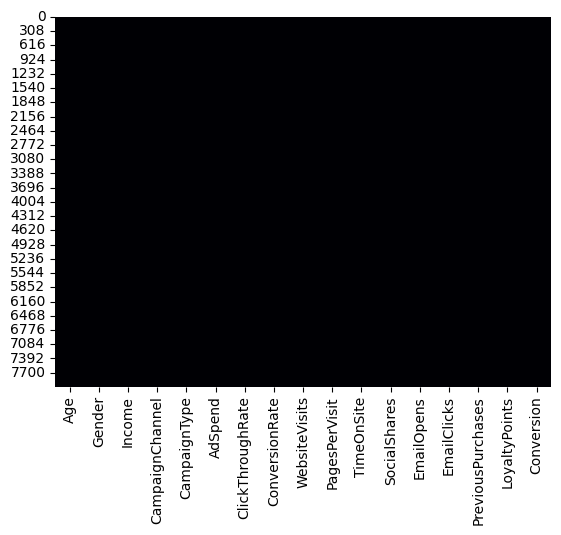

In [ ]:
#Heatmap for null values
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);


> There are no null or duplicate values present in the dataset

### **Outlier Detection**

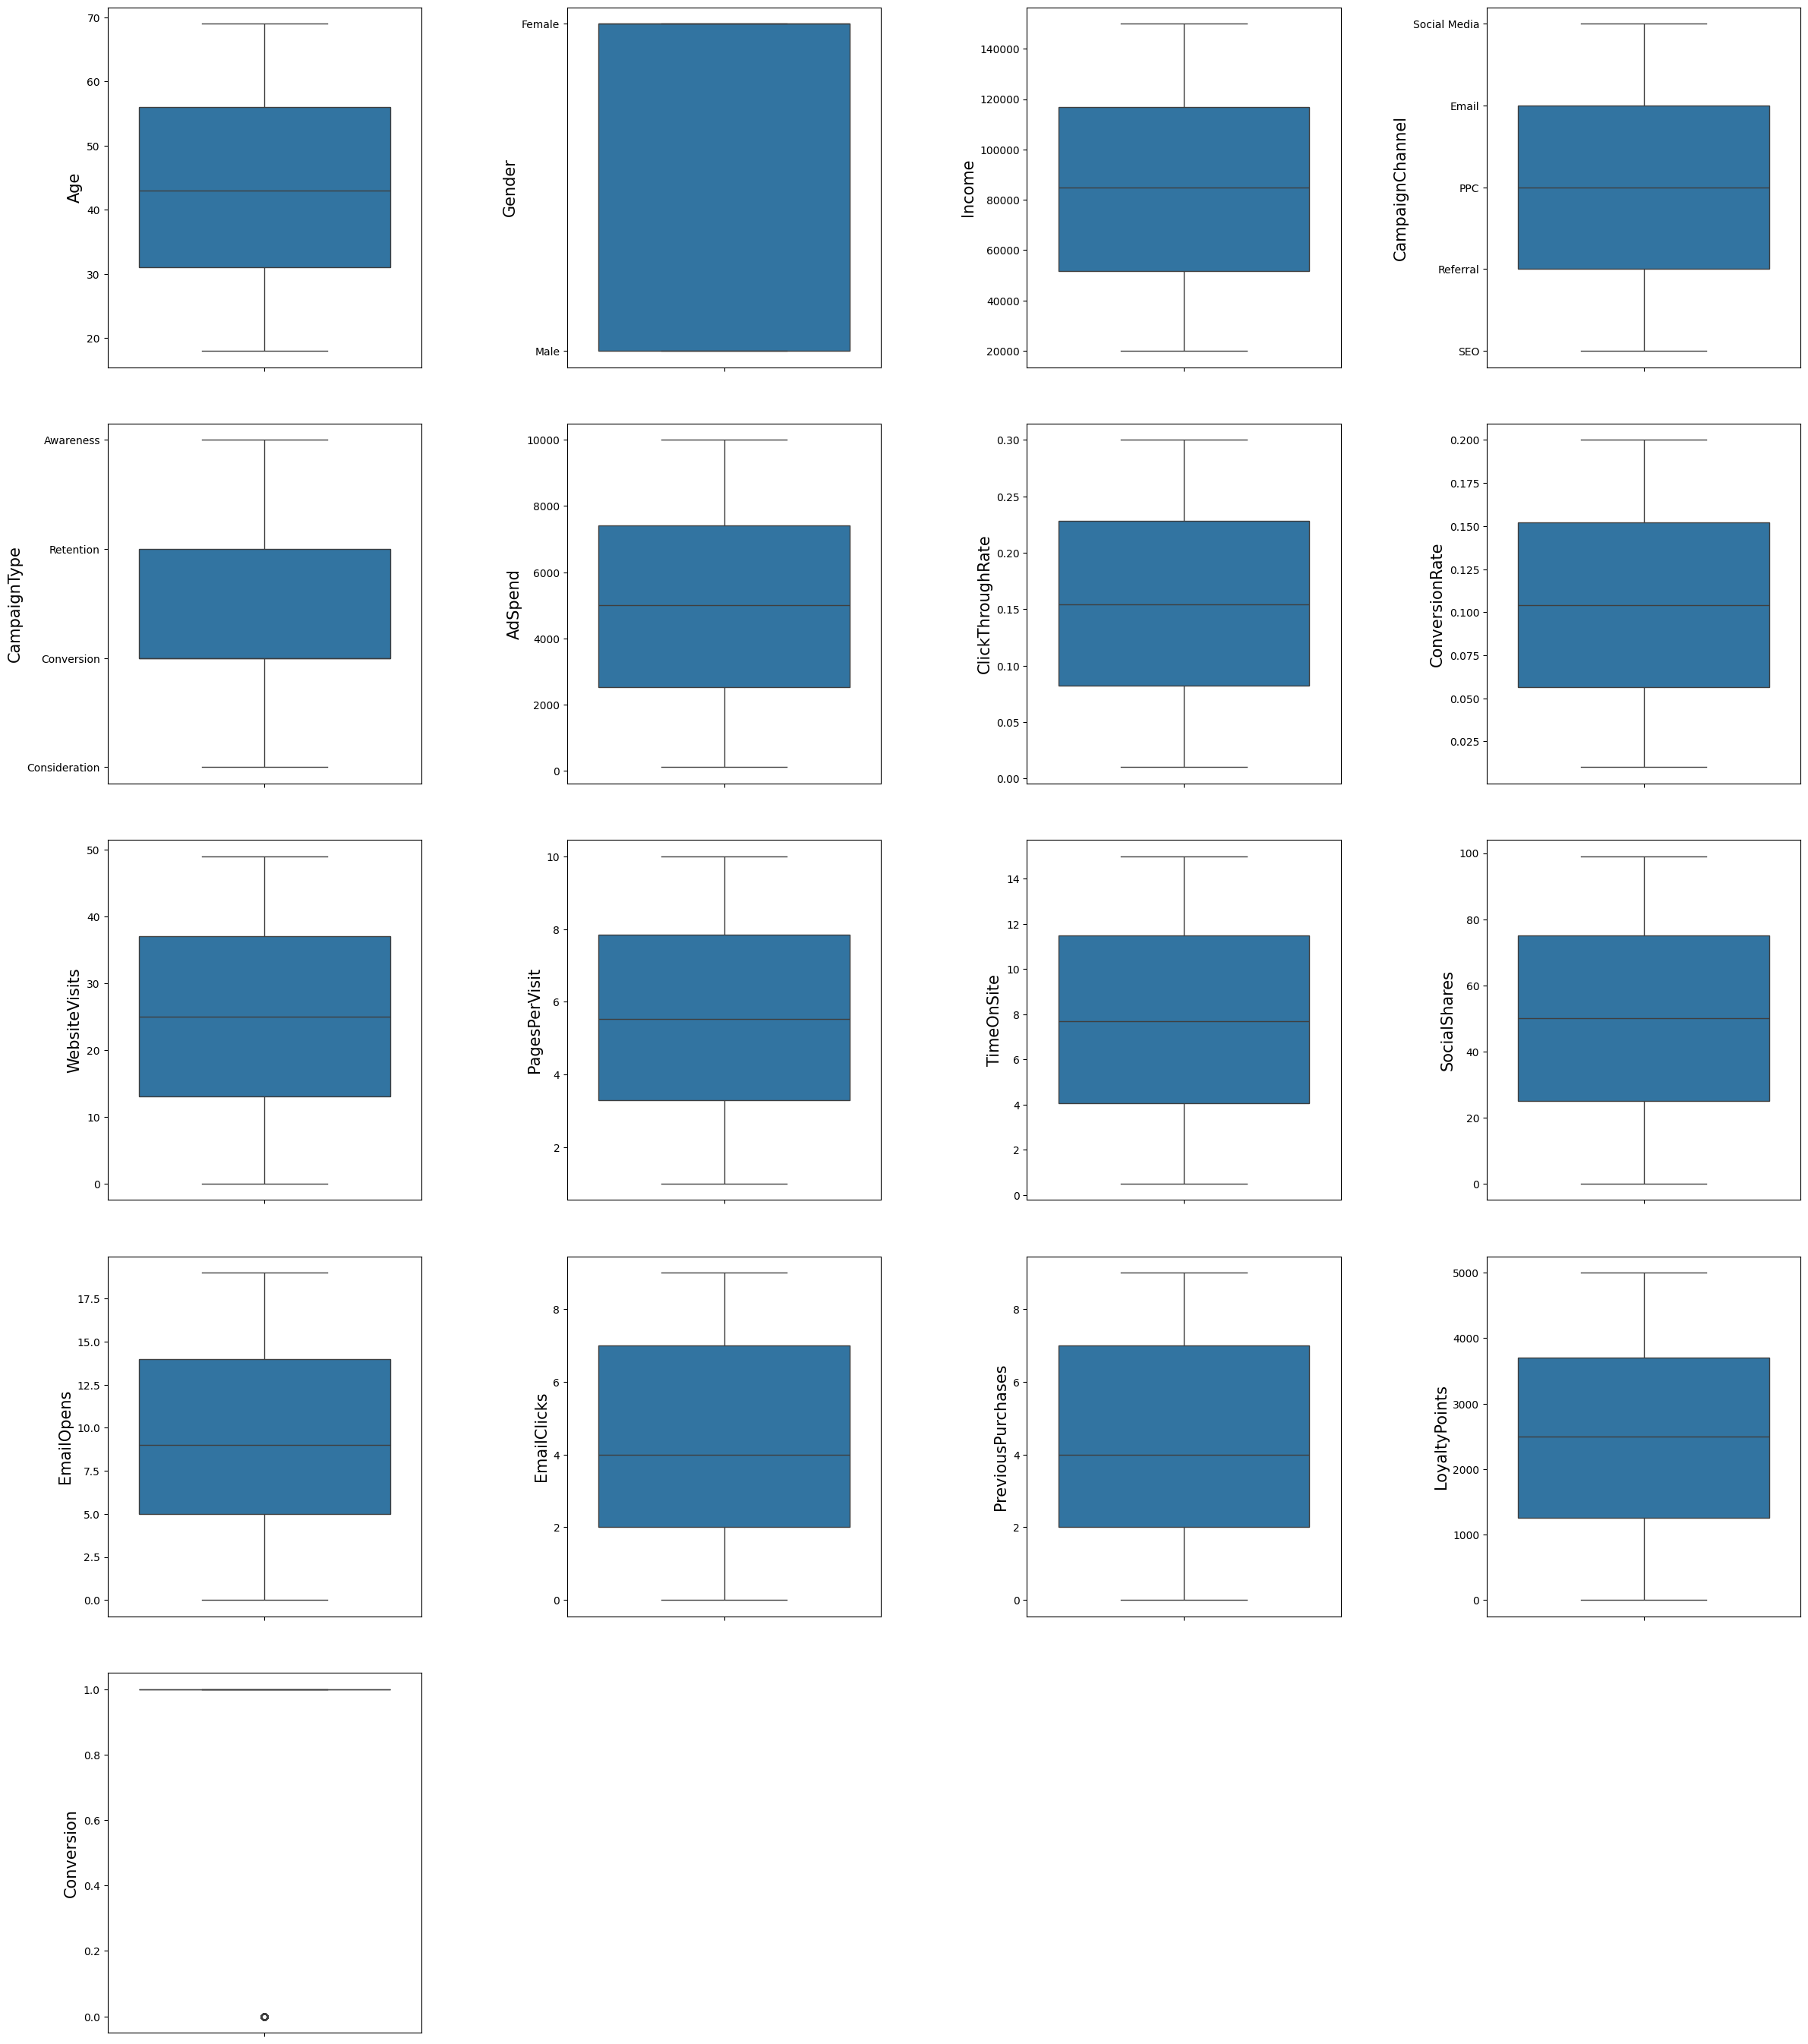

In [ ]:
#Boxplots to detect potential outliers
fig = plt.figure(figsize=(25,50))
for i in range(len(df.columns)):
    ax = fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i], ax=ax)
    ax.set_ylabel(df.columns[i], fontsize=15)

plt.tight_layout(pad=5.0)
plt.show()



> There are no outliers present in the dataset



### **Categorical Variable Analysis and Descriptive Statistics**

In [ ]:
#Finding unique columns in each column
print("\n\033[1mNumber of unique values in each column:\033[0m")

for col in df.columns:
    print(f"\033[1m{col}\033[0m: {df[col].nunique()}")


Number of unique values in each column:
Age: 52
Gender: 2
Income: 7789
CampaignChannel: 5
CampaignType: 4
AdSpend: 8000
ClickThroughRate: 8000
ConversionRate: 8000
WebsiteVisits: 50
PagesPerVisit: 8000
TimeOnSite: 8000
SocialShares: 100
EmailOpens: 20
EmailClicks: 10
PreviousPurchases: 10
LoyaltyPoints: 3983
Conversion: 2


In [ ]:
#Printing out numerical and categorical features
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if df[i].dtype == 'object' or i == 'Conversion':
        categorical_features.append(i)
    elif df[i].dtype == 'int64' or df[i].dtype == 'float64':
        numerical_features.append(i)
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender CampaignChannel CampaignType Conversion
Numerical Features : Age Income AdSpend ClickThroughRate ConversionRate WebsiteVisits PagesPerVisit TimeOnSite SocialShares EmailOpens EmailClicks PreviousPurchases LoyaltyPoints


#### **Analysis of Categorical Features**

In [ ]:
display(categorical_features)

['Gender', 'CampaignChannel', 'CampaignType', 'Conversion']

In [ ]:
# Show the unique values for each of the categorical features
for col_cat in categorical_features:
        print(str(col_cat) + ' : ' + str(df[col_cat].unique()))
        print(df[col_cat].value_counts())
        print("________________________________________________________________________________")

Gender : ['Female' 'Male']
Gender
Female    4839
Male      3161
Name: count, dtype: int64
________________________________________________________________________________
CampaignChannel : ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64
________________________________________________________________________________
CampaignType : ['Awareness' 'Retention' 'Conversion' 'Consideration']
CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64
________________________________________________________________________________
Conversion : [1 0]
Conversion
1    7012
0     988
Name: count, dtype: int64
________________________________________________________________________________


In [ ]:
desc = df[categorical_features].describe(include='O').T
desc['unique_values'] = desc.index.map(lambda col: df[col].unique().tolist())
desc.style.background_gradient(axis=None, cmap="Blues", vmin=0, vmax=9000)

#### **Analysis of Numerical Features**

In [ ]:
display(df[numerical_features])

Age  Income  AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0      56  136912  6497.87              0.04            0.09              0   
1      69   41760  3898.67              0.16            0.18             42   
2      46   88456  1546.43              0.28            0.08              2   
3      32   44085   539.53              0.14            0.09             47   
4      60   83964  1678.04              0.25            0.11              0   
...   ...     ...      ...               ...             ...            ...   
7995   21   24849  8518.31              0.24            0.12             23   
7996   43   44718  1424.61              0.24            0.19             49   
7997   28  125471  4609.53              0.06            0.13             35   
7998   19  107862  9476.11              0.02            0.14             49   
7999   31   93002  7743.63              0.19            0.06             15   

      PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  EmailClicks  \
0              2.40        7.40            19           6            9   
1              2.92        5.35             5           2            7   
2              8.22       13.79             0          11            2   
3              4.54       14.69            89           2            2   
4              2.05       13.99             6           6            6   
...             ...         ...           ...         ...          ...   
7995           9.69       14.23            70          13            6   
7996           9.50        3.50            52          13            1   
7997           2.85       14.62            38          16            0   
7998           1.00        3.88            86           1            5   
7999           6.96       12.76             2          18            9   

      PreviousPurchases  LoyaltyPoints  
0                     4            688  
1                     2           3459  
2                     8           2337  
3                     0           2463  
4                     8           4345  
...                 ...            ...  
7995                  7            286  
7996                  5           1502  
7997                  3            738  
7998                  7           2709  
7999                  9            341  

[8000 rows x 13 columns]

In [ ]:
# Show the unique values on each numerical features
for col_num in numerical_features:
        print(str(col_num) + ' : ' + str(df[col_num].unique()))
        print(df[col_num].value_counts())
        print("----" * 25)

Age : [56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]
Age
64    187
62    182
43    178
66    178
34    177
49    173
45    173
52    172
40    170
42    167
46    165
39    165
25    162
38    162
21    160
54    160
30    157
32    157
57    157
37    156
35    155
51    155
68    155
23    154
28    153
36    153
20    151
41    151
47    150
61    150
19    150
53    149
50    149
18    148
29    148
31    148
33    148
56    147
69    147
59    146
58    144
26    143
55    143
63    140
22    139
60    139
67    137
65    137
27    136
24    129
44    128
48    120
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Income : [136912  41760  88456 ...  24849 125471 107862]
Income
50268     3
73096     3
119233    3
142982    2
146718    2
         ..
108148    1
144401    1
115066    1
113177    1


> **Descriptive Statistical Analysis of Numerical Features:**

* Count
* Mean
* Median
* Standard Deviation
* Variance
* Minimum
* 25%
* 50%
* 75%
* Maximum
* Skewness
* Kurtosis



In [ ]:
# Calculate descriptive statistics
d_stats = df[numerical_features].describe().T


d_stats['Median'] = df[numerical_features].median()
d_stats['Variance'] = df[numerical_features].var()
d_stats['Skewness'] = df[numerical_features].skew()
d_stats['Kurtosis'] = df[numerical_features].kurtosis()

# Apply styling
desc_stats = d_stats.style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000)

# Display the styled DataFrame
desc_stats

> * Dataset has **8000 rows** and **20 columns**
* '**AdvertisingPlatform**' & '**AdvertisingTool**' are confidential columns, thus dropping them from the study
* **Conversion** is the target variable with binary Inputs, thus a binary classification task needs to be performed
* There are no null(NaN) values and duplicate values present in the dataset



> * **CustomerID:** All values are unique (count equals the number of rows).
* **Age:** The average age is around 43.6 years old, with a range of 18 to 69 years old (based on min and max values).
* **Income:** The average income is around $84,664, with a significant standard deviation, indicating a spread in income levels.
* **Click Through Rate (CTR) and Conversion Rate:** The average CTR is 0.15%, and the average conversion rate is 0.10%. Both values are relatively low.
* **Website Visits and PagesPerVisit:** The average number of website visits, page visits and time spent on site per customer is around 24.75 and 5.55 repectively
* **TimeOnSite:** The average time spend on the website per customer is around 7.73 mins
* **SocialShares:** The average number of social shares per customer is around 49.80
* **EmailOpens and EmailClicks:** The average number of email opens and email clicks per customer is around 9.48 and 4.47
* **PreviousPurchases:** The average number of previous purchases per customer is around 4.49
* **LoyaltyPoints:** The average number of loyality points per customer is around 2490.27


In [ ]:
#Dividing the features
categorical_features = ['Gender', 'CampaignChannel', 'CampaignType']

numerical_features = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
                              'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
outcome = ['Conversion']

### **Distribution of Categorical & Numerical Features**

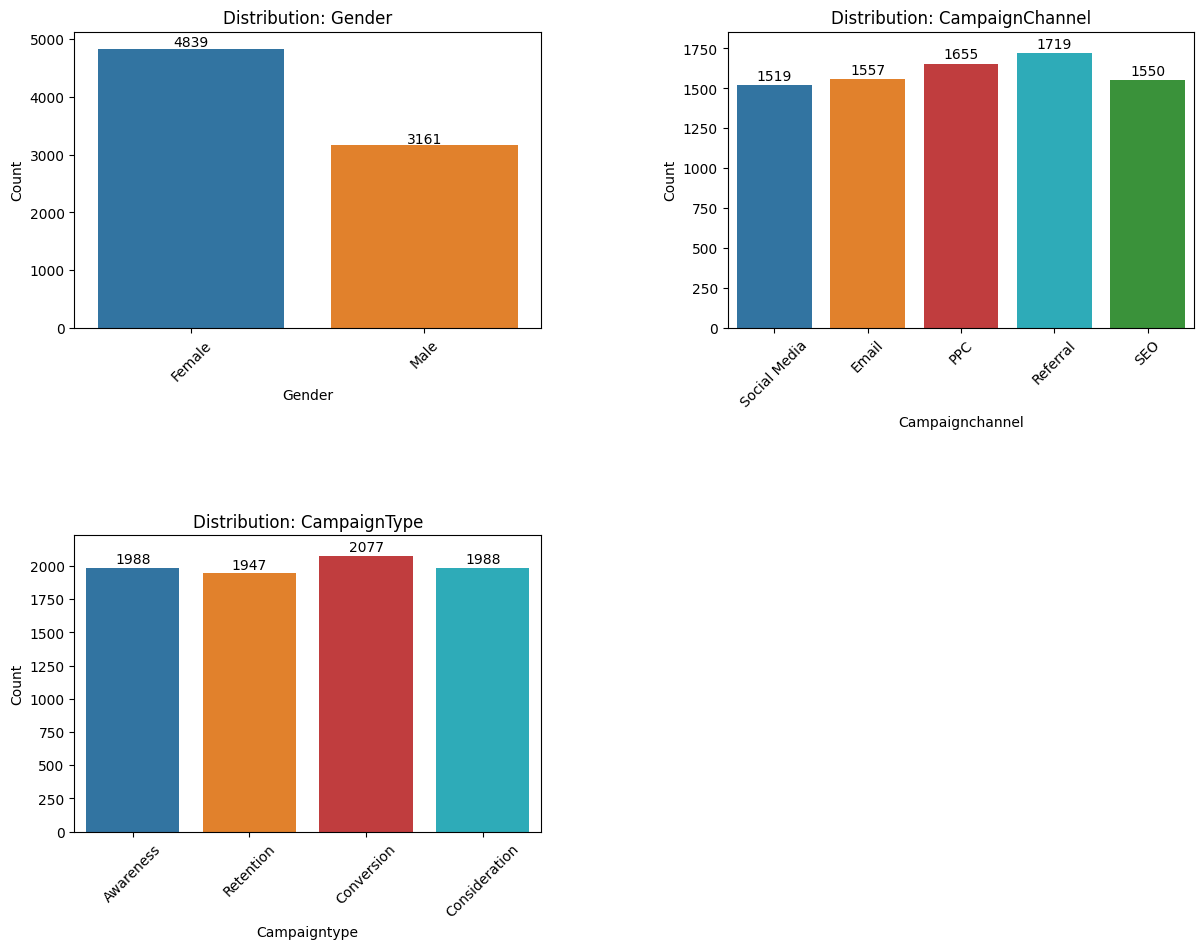

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palettes = {
    'Gender': ['#1f77b4', '#ff7f0e'],
    'CampaignChannel': ['#1f77b4', '#ff7f0e', '#d62728', '#17becf', '#2ca02c'],
    'CampaignType': ['#1f77b4', '#ff7f0e', '#d62728', '#17becf']
}

# Calculate the number of rows needed for subplots
num_rows = (len(palettes) + 1) // 2

# Create subplots with increased figsize
fig, axes = plt.subplots(num_rows, 2, figsize=(14, 5 * num_rows))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.7)
axes = axes.flatten()

# Iterate and plot
for i, (feature, palette) in enumerate(palettes.items()):
    ax = axes[i]
    sns.countplot(x=feature, data=df, palette=palette, ax=ax)
    ax.set(ylabel="Count", title=f'Distribution: {feature}', xlabel=feature.capitalize())
    ax.tick_params(axis='x', rotation=45)

    # Add count labels on top of bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 30,
                round(p.get_height()), ha="center")

    ax.set_ylim(0, ax.get_ylim()[1] + 50)

# Hide any unused subplots
for ax in axes[len(palettes):]:
    ax.axis('off')

plt.show()

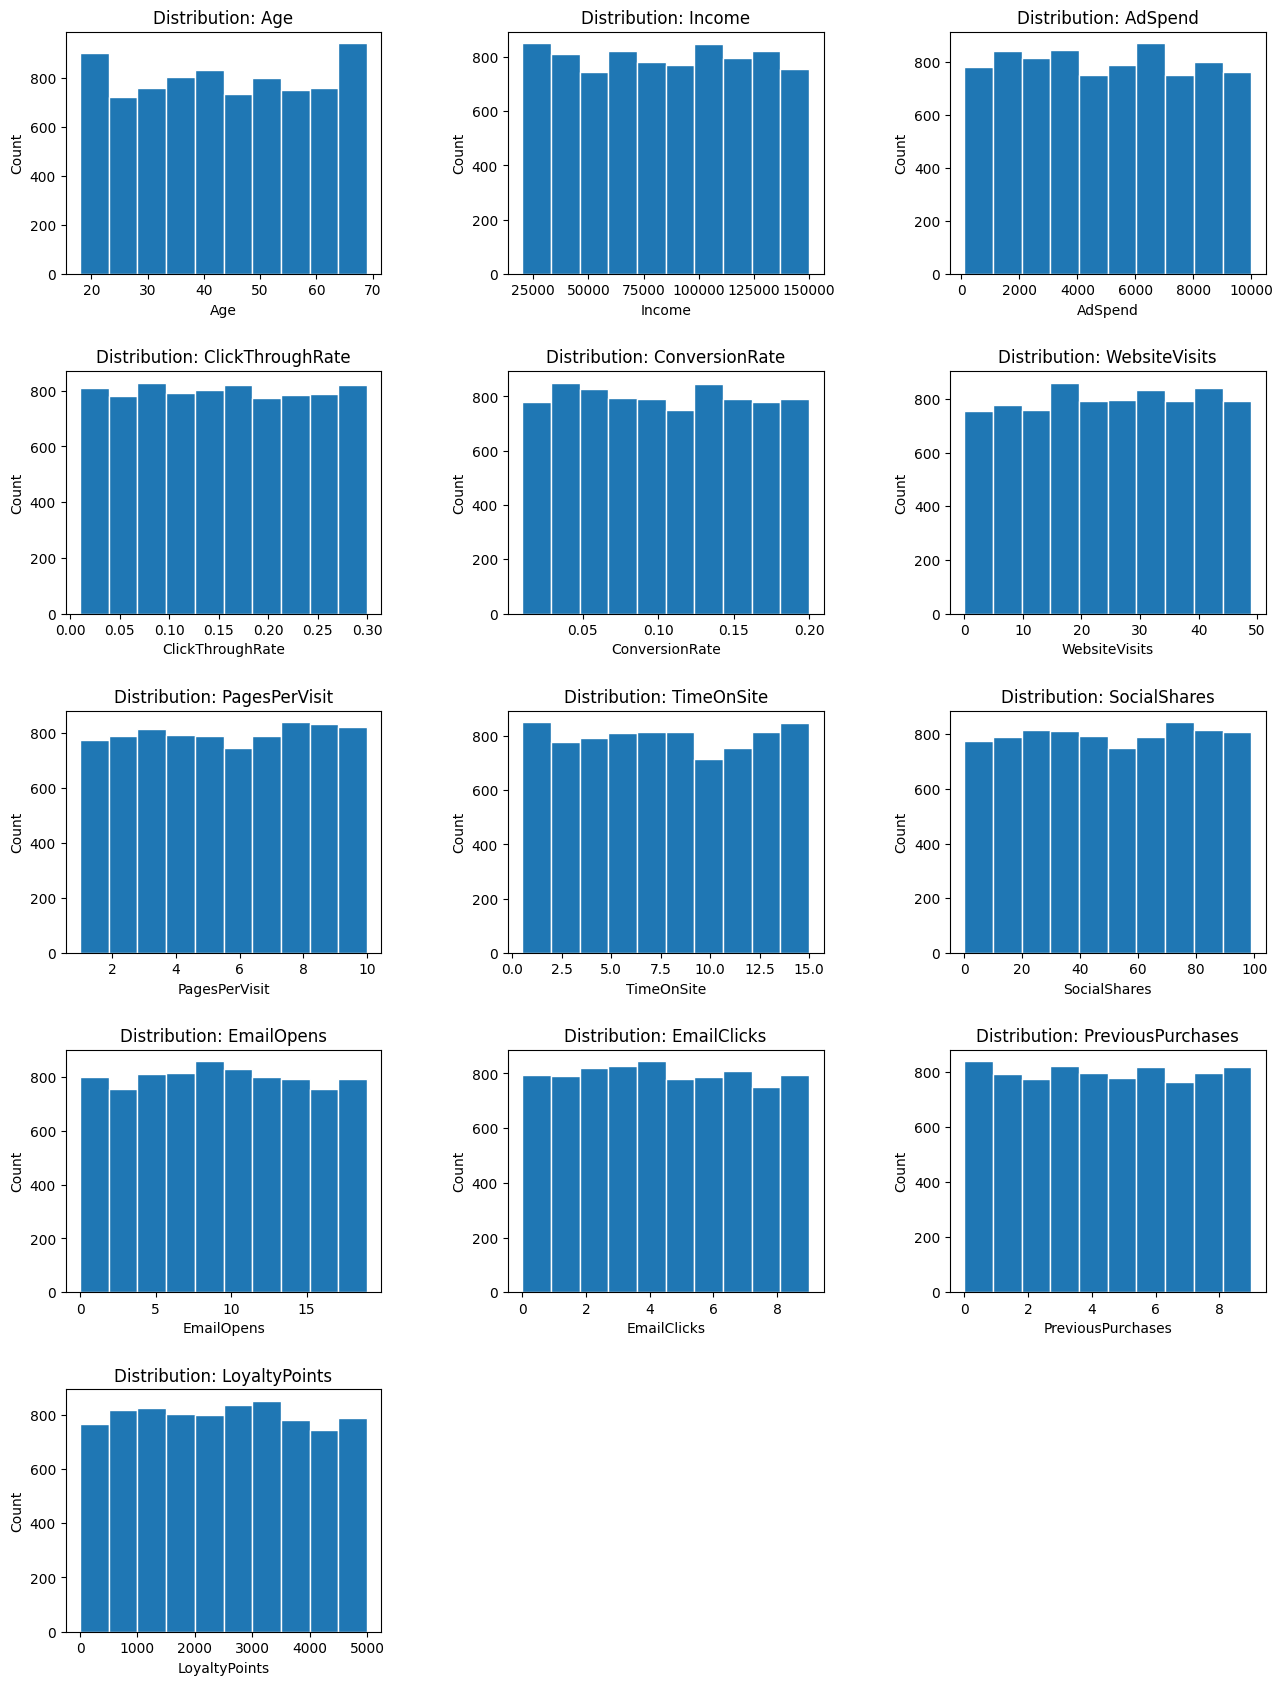

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Flatten the ax array for easy iteration
ax = ax.flatten()

for i, feature in enumerate(numerical_features):
    ax[i].hist(df[feature], color='#1f77b4', edgecolor='white', align='mid')
    ax[i].set_title(f'Distribution: {feature}')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Count')

# Hide any unused subplots
for i in range(len(numerical_features), len(ax)):
    fig.delaxes(ax[i])

plt.show()

#### **Understanding the relationship of Features with Conversion**

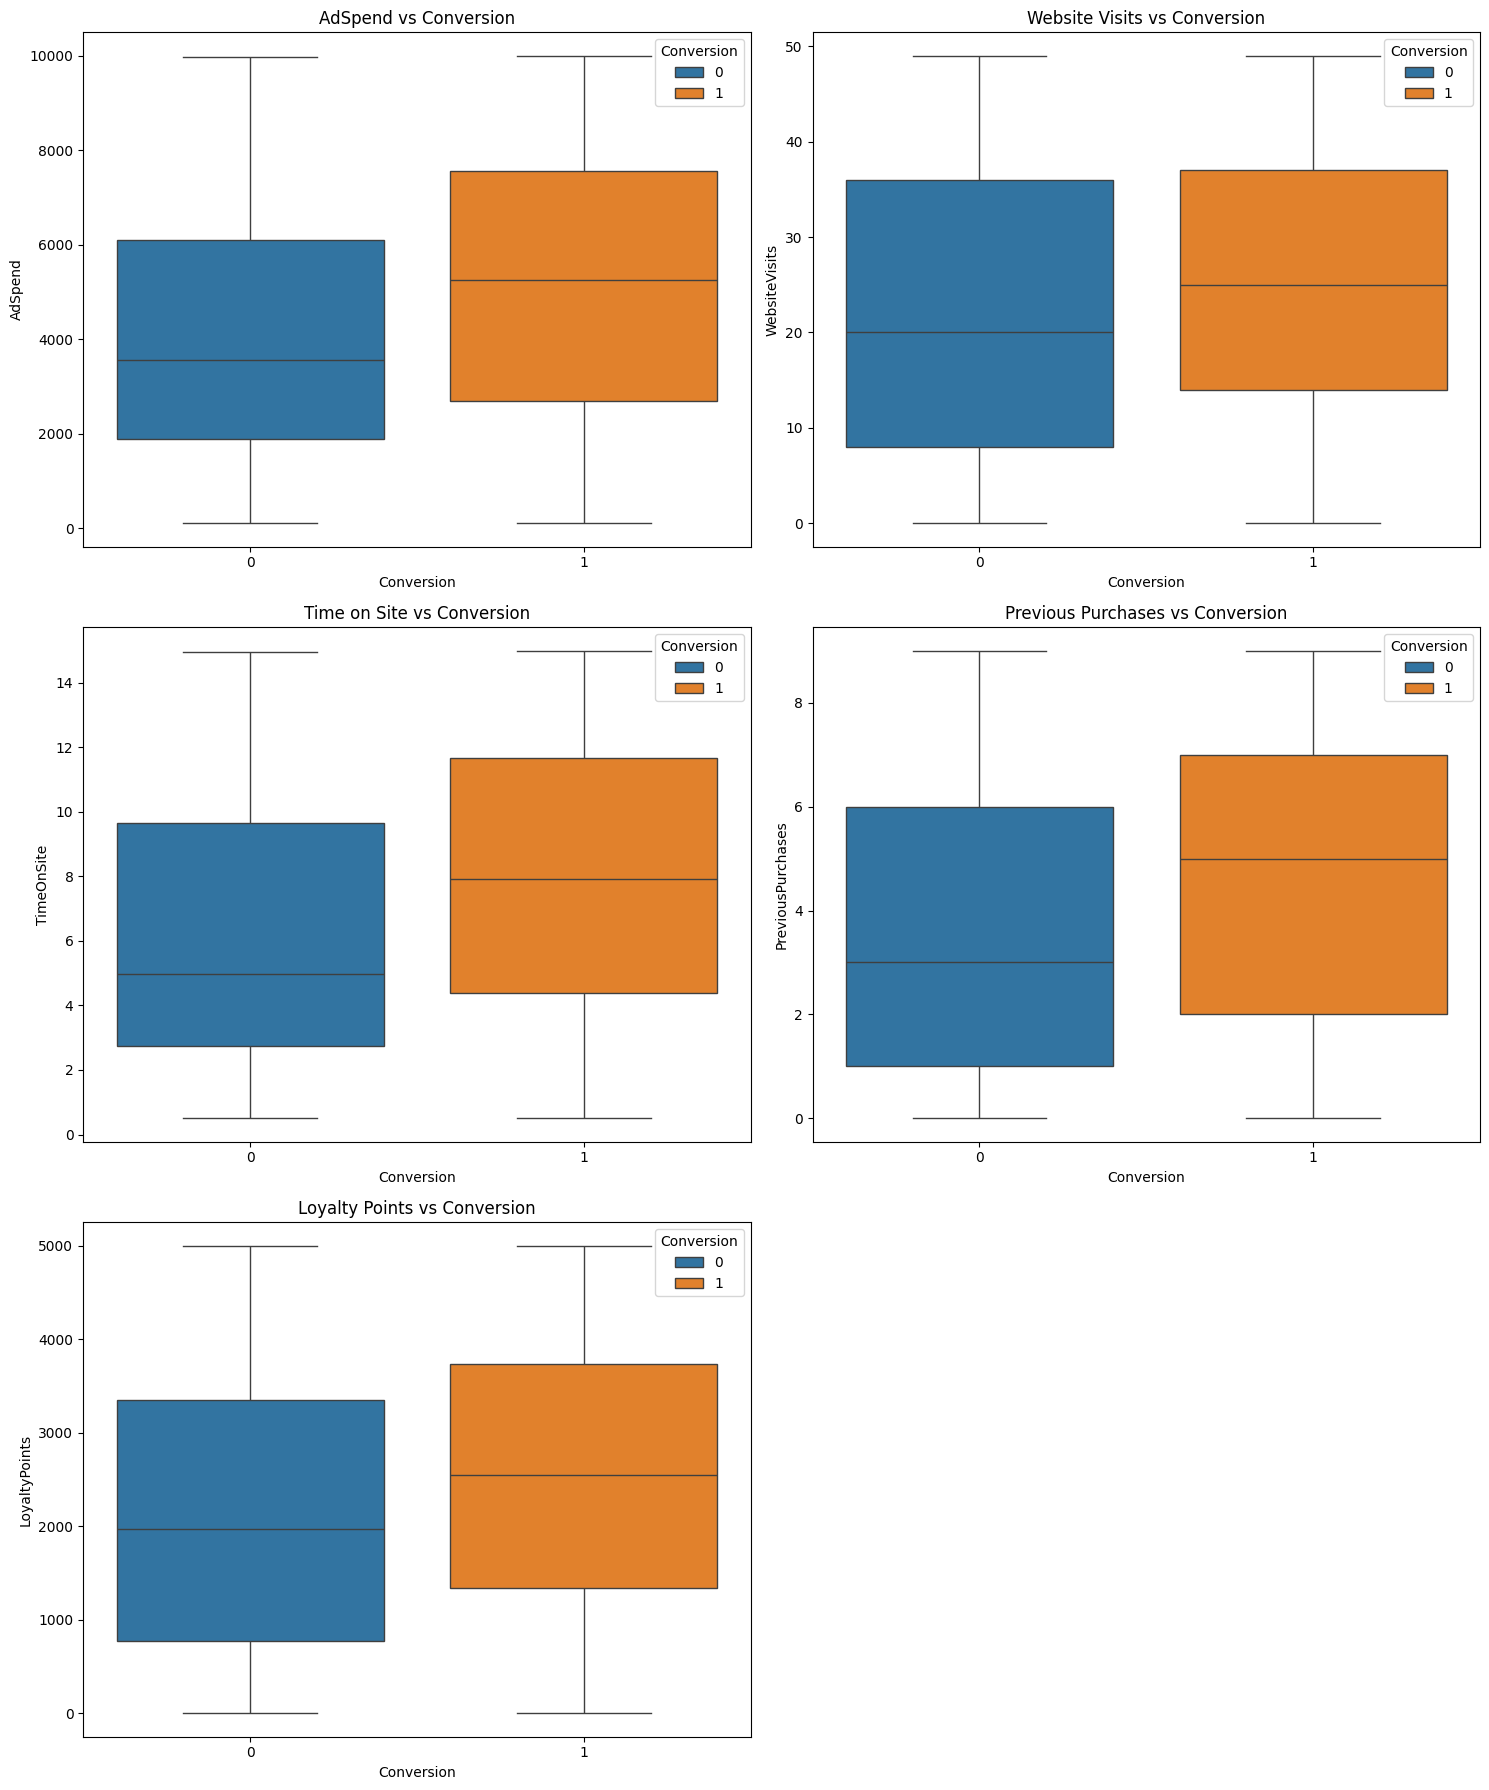

In [ ]:
# Creating subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Boxplot for AdSpend vs Conversion
sns.boxplot(x='Conversion', y='AdSpend', data=df, hue='Conversion', ax=axes[0, 0])
axes[0, 0].set_title('AdSpend vs Conversion')

# Boxplot for WebsiteVisits vs Conversion
sns.boxplot(x='Conversion', y='WebsiteVisits', data=df, hue='Conversion', ax=axes[0, 1])
axes[0, 1].set_title('Website Visits vs Conversion')

# Boxplot for TimeOnSite vs Conversion
sns.boxplot(x='Conversion', y='TimeOnSite', data=df, hue='Conversion', ax=axes[1, 0])
axes[1, 0].set_title('Time on Site vs Conversion')

# Boxplot for PreviousPurchases vs Conversion
sns.boxplot(x='Conversion', y='PreviousPurchases', data=df, hue='Conversion', ax=axes[1, 1])
axes[1, 1].set_title('Previous Purchases vs Conversion')

# Boxplot for LoyaltyPoints vs Conversion
sns.boxplot(x='Conversion', y='LoyaltyPoints', data=df, hue='Conversion', ax=axes[2, 0])
axes[2, 0].set_title('Loyalty Points vs Conversion')

# Remove the empty subplot (axes[2, 1])
fig.delaxes(axes[2, 1])

# Adjusting the layout for better visualization
plt.tight_layout()

# Displaying the subplots
plt.show()

#### **Coefficient of Variation**

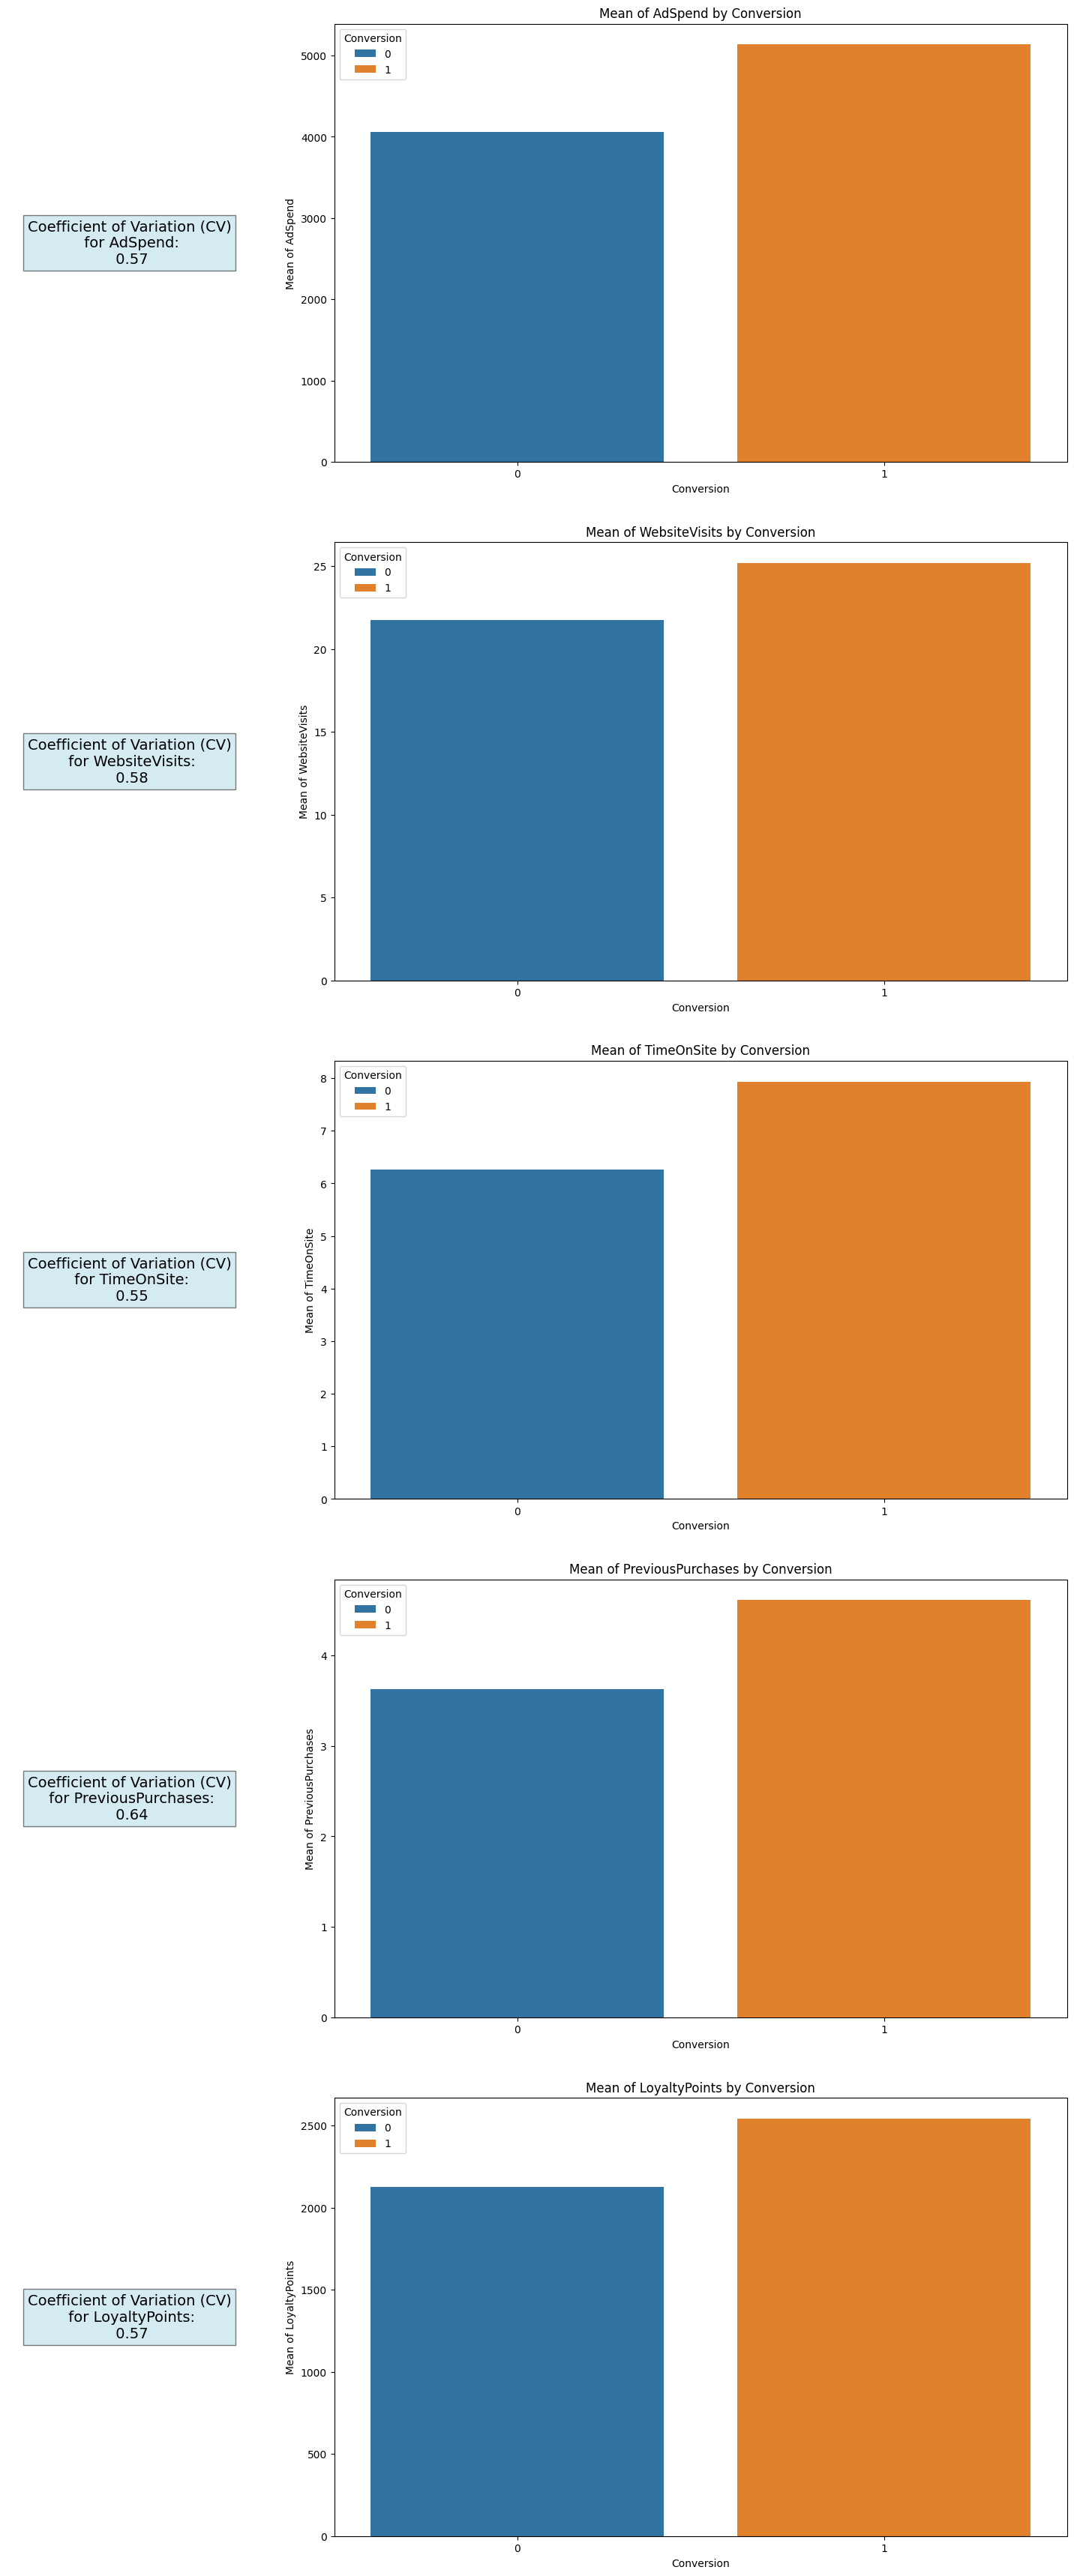

In [ ]:
# List of variables to calculate the indicators
variables = ['AdSpend', 'WebsiteVisits', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints']

# Creating subplots with adjusted figure size and spacing
fig, axes = plt.subplots(len(variables), 2, figsize=(15, 7 * len(variables)), gridspec_kw={'width_ratios': [1, 3]}) # Adjusted figure size and added gridspec

# Loop to calculate indicators and create plots
for i, var in enumerate(variables):
    # Coefficient of Variation (CV)
    cv = df[var].std() / df[var].mean()

    # Mean by conversion
    mean_conversion = df.groupby('Conversion')[var].mean()

    # Display Coefficient of Variation with larger font size and adjusted position
    axes[i, 0].text(0.5, 0.5, f'Coefficient of Variation (CV)\n for {var}:\n {cv:.2f}', # Added newlines for better formatting
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=14, bbox=dict(facecolor='lightblue', alpha=0.5))
    axes[i, 0].axis('off')

    # Barplot for mean by conversion with hue and adjusted spacing
    sns.barplot(x=mean_conversion.index, y=mean_conversion.values, hue=mean_conversion.index, ax=axes[i, 1])
    axes[i, 1].set_title(f'Mean of {var} by Conversion')
    axes[i, 1].set_xlabel('Conversion')
    axes[i, 1].set_ylabel(f'Mean of {var}')

# Adjusting layout for better spacing
plt.tight_layout(pad=3.0) # Increased padding between subplots
plt.show()

#### **Gini Index**

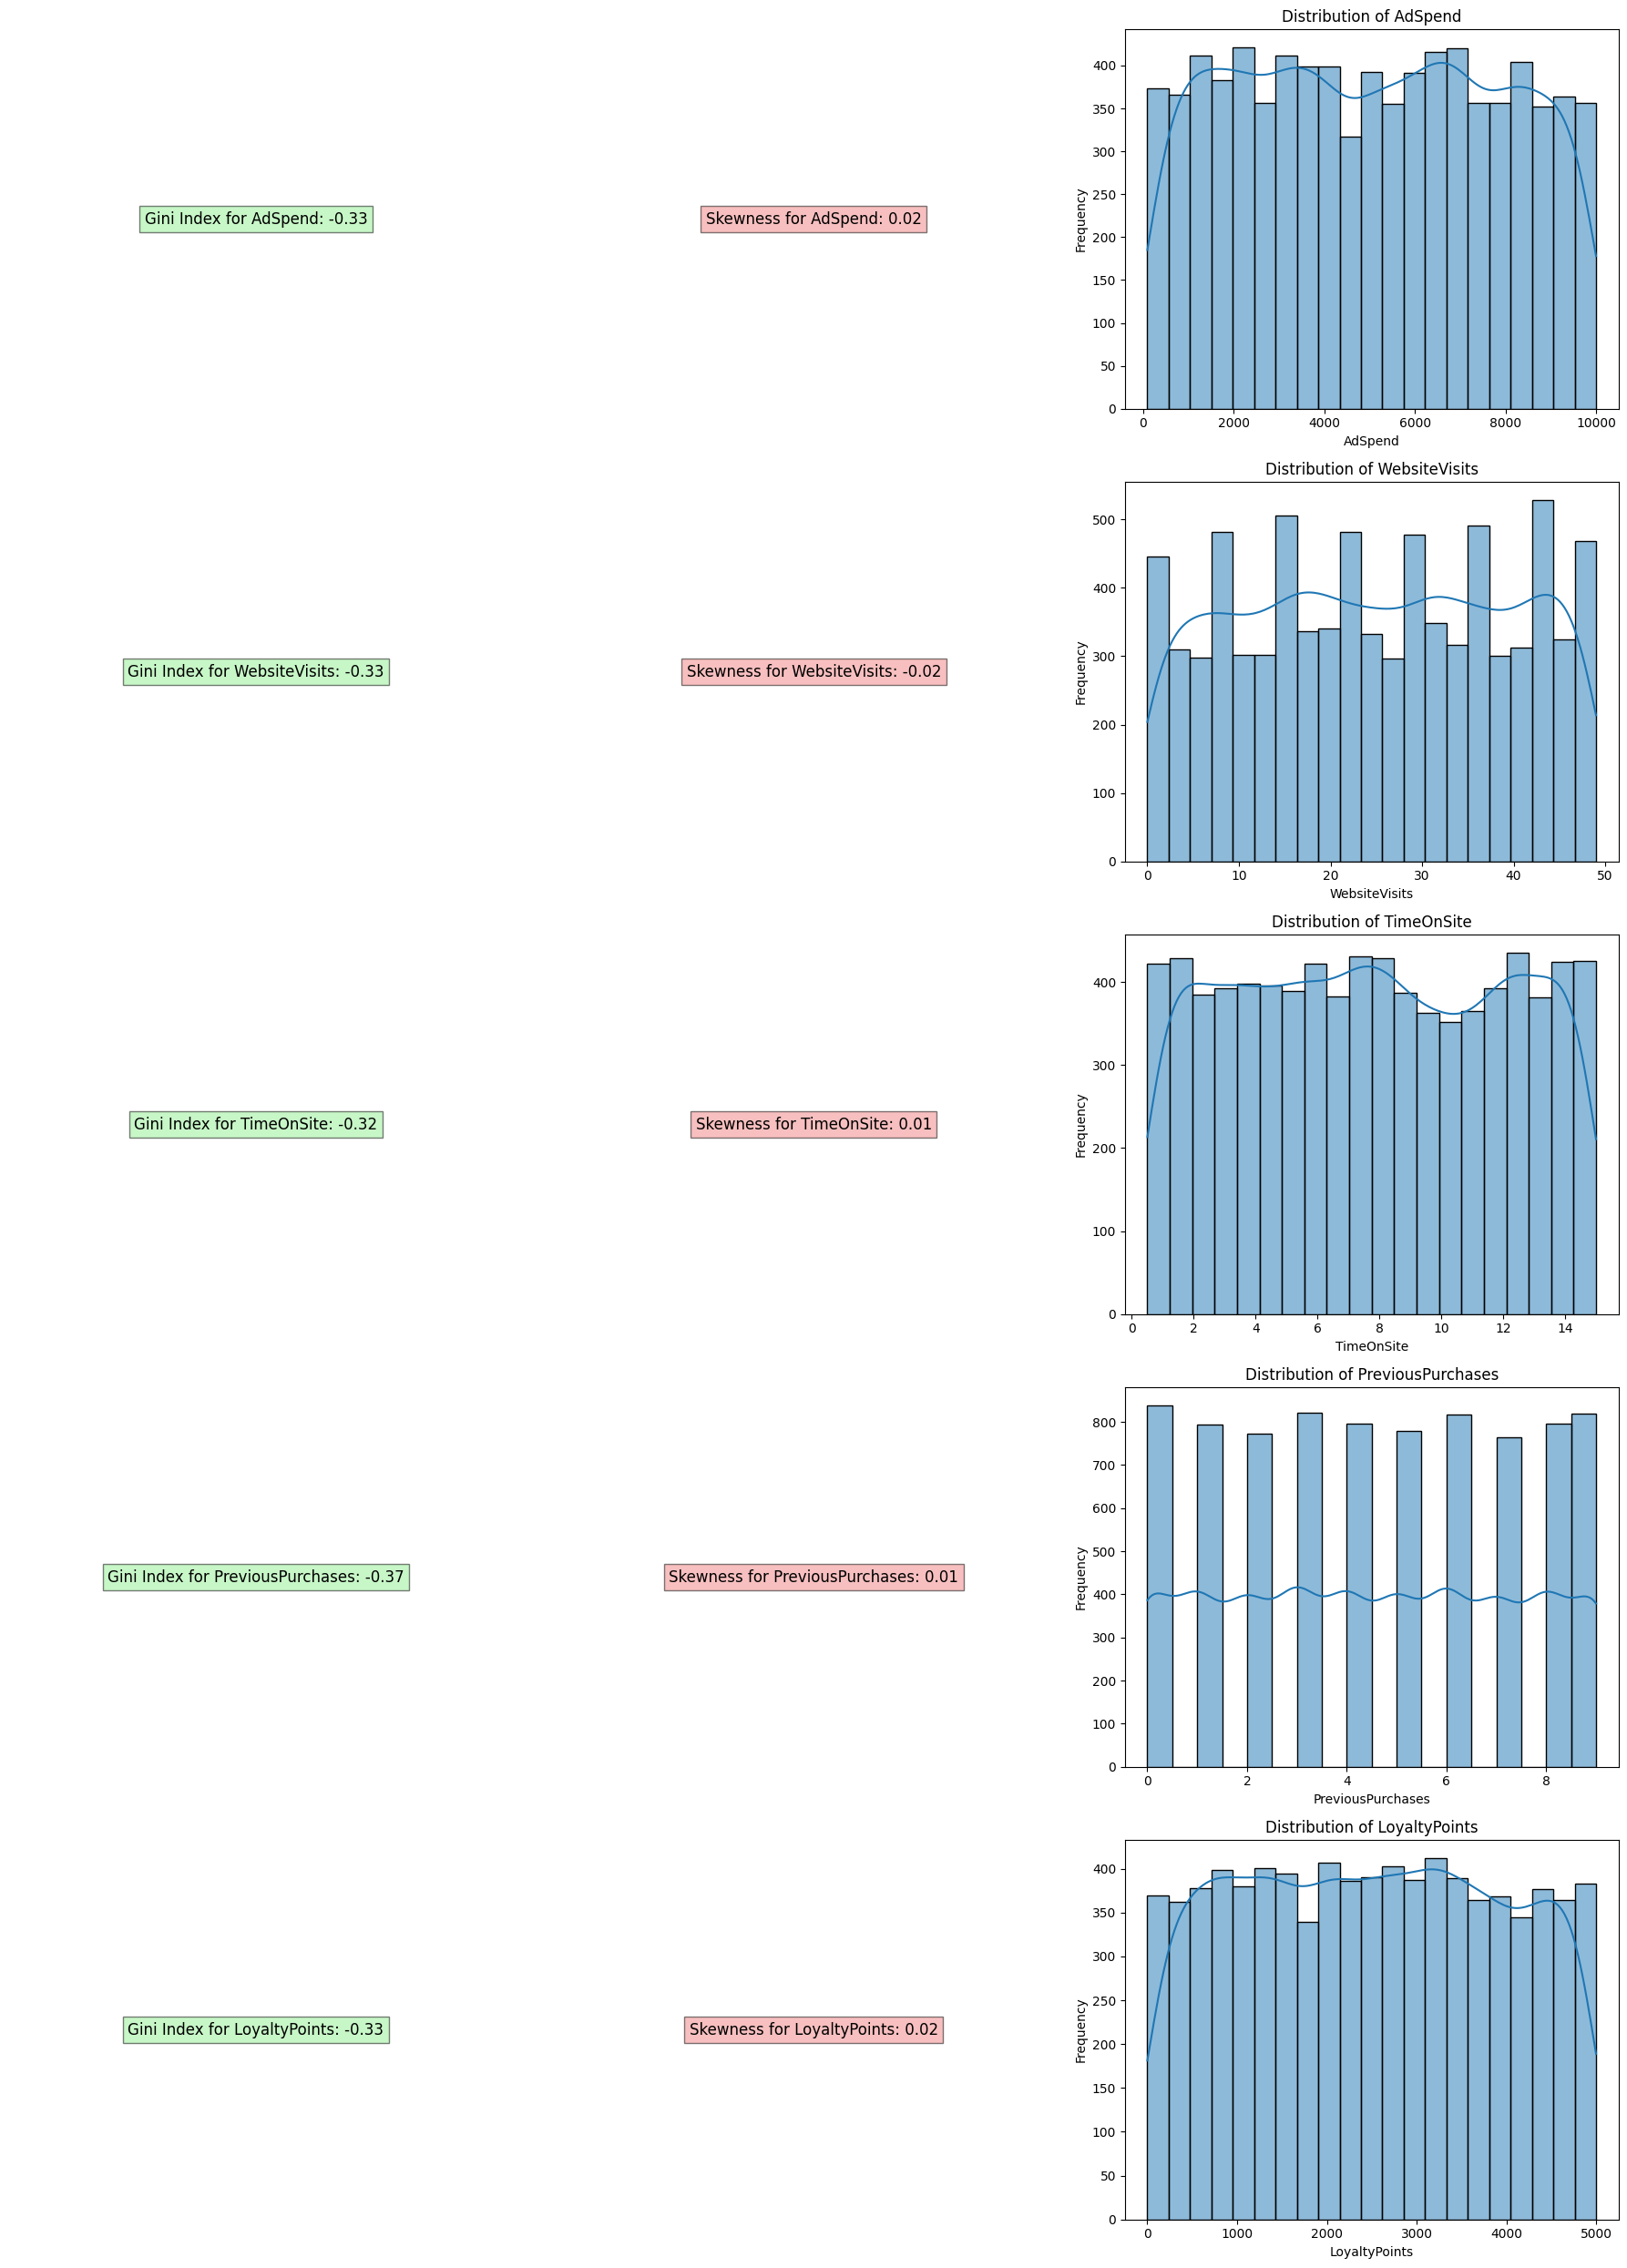

In [ ]:
from scipy.stats import skew

# List of variables to calculate the indicators
variables = ['AdSpend', 'WebsiteVisits', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints']

# Function to calculate the Gini Index
def gini(array):
    sorted_array = np.sort(array)
    n = len(array)
    cumulative_values = np.cumsum(sorted_array)
    gini_index = (2 * np.sum(cumulative_values) / (n * cumulative_values[-1])) - (n + 1) / n
    return gini_index

# Creating subplots
fig, axes = plt.subplots(len(variables), 3, figsize=(18, 5 * len(variables)))

# Loop to calculate indicators and create plots
for i, var in enumerate(variables):
    # Gini Index
    gini_index = gini(df[var])

    # Coefficient of Skewness
    skewness = skew(df[var])

    # Display Gini Index
    axes[i, 0].text(0.5, 0.5, f'Gini Index for {var}: {gini_index:.2f}',
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
    axes[i, 0].axis('off')

    # Display Coefficient of Skewness
    axes[i, 1].text(0.5, 0.5, f'Skewness for {var}: {skewness:.2f}',
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=12, bbox=dict(facecolor='lightcoral', alpha=0.5))
    axes[i, 1].axis('off')

    # Histogram of the variable
    sns.histplot(df[var], kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'Distribution of {var}')
    axes[i, 2].set_xlabel(var)
    axes[i, 2].set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()

### **Customer Engagement and Conversion**

*   Customer Demographic Analysis
*   Customer Engagement Metrics



#### **Customer Demographic Analysis**

##### **1. Age vs Conversion**

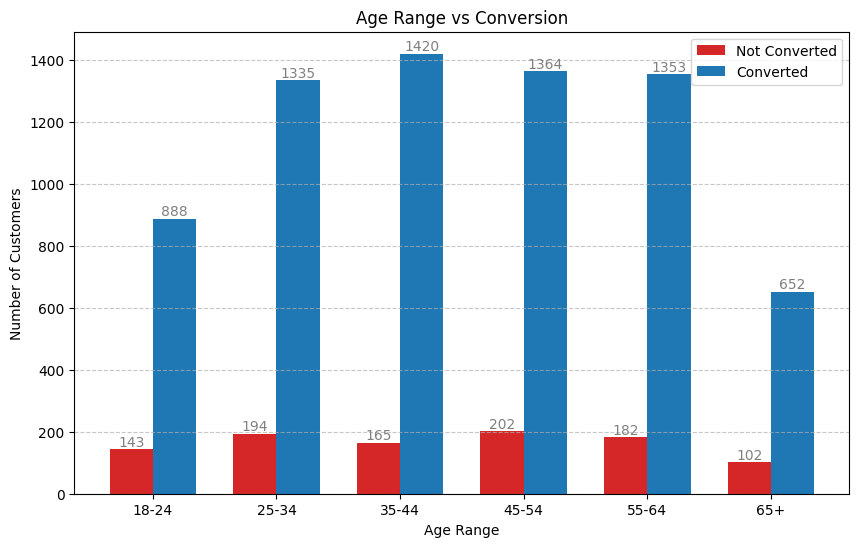

In [ ]:
# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, np.inf]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age ranges
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age range and conversion status, then count
age_conversions = df.groupby(['Age Range', 'Conversion'])['Age'].count().unstack(fill_value=0)

x = np.arange(len(age_conversions.index))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, age_conversions[0], width, label='Not Converted', color='#d62728')
rects2 = ax.bar(x + width/2, age_conversions[1], width, label='Converted', color='#1f77b4')

# Labels and Title
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Customers')
ax.set_title('Age Range vs Conversion')
ax.set_xticks(x)
ax.set_xticklabels(age_conversions.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, f'{height}',
        ha='center', va='bottom', fontsize=10, color='#808080'
    )

ax.legend()
plt.xticks(rotation=0)
plt.show()


>
* **35–44 years:** Highest conversions
* **25–34 years:** Second highest
* **45–54 years:** Third highest
* **55–64 years:** Fourth highest
* **18–24 years:** Lower conversions but significant
* **65+ years:** Lowest conversions







##### **2. Gender vs Conversion**

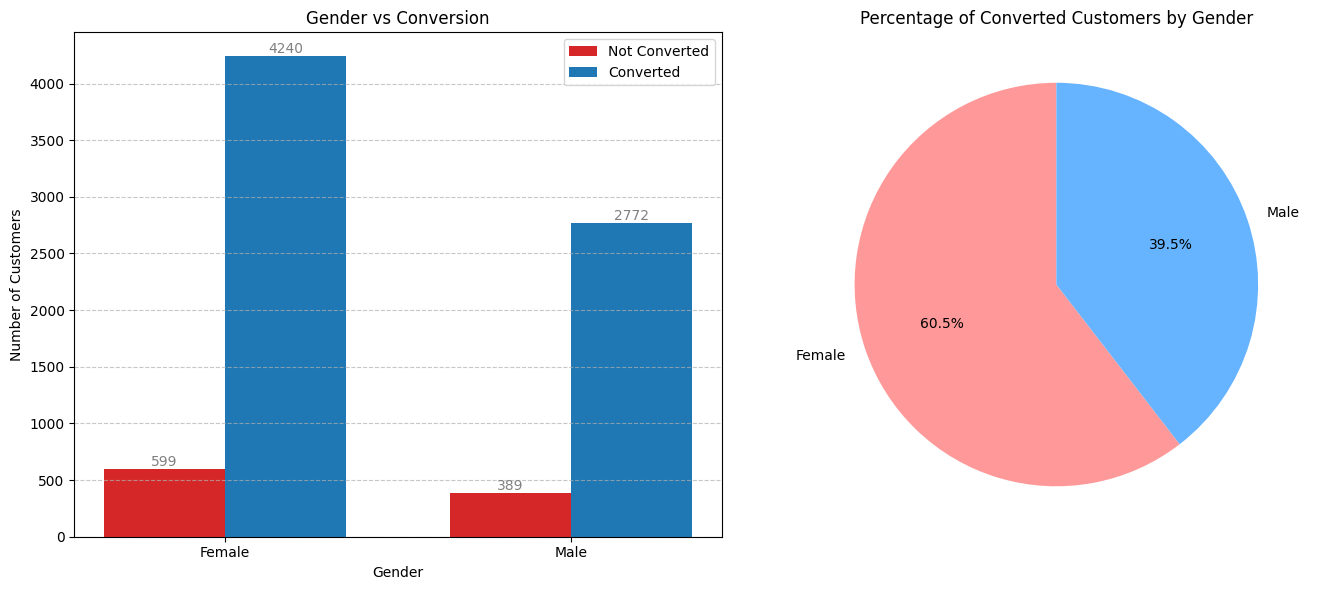

In [ ]:
# Group by gender and conversion status, then count
gender_conversions = df.groupby(['Gender', 'Conversion'])['Gender'].count().unstack(fill_value=0)

#Bar Chart
x = np.arange(len(gender_conversions.index))
width = 0.35
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
rects1 = ax[0].bar(x - width/2, gender_conversions[0], width, label='Not Converted', color='#d62728')
rects2 = ax[0].bar(x + width/2, gender_conversions[1], width, label='Converted', color='#1f77b4')

ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of Customers')
ax[0].set_title('Gender vs Conversion')
ax[0].set_xticks(x)
ax[0].set_xticklabels(gender_conversions.index)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

for rect in rects1 + rects2:
    height = rect.get_height()
    ax[0].text(
        rect.get_x() + rect.get_width() / 2, height, f'{height}',
        ha='center', va='bottom', fontsize=10, color='#808080'
    )

ax[0].legend()
ax[0].tick_params(axis='x', rotation=0)

# Pie chart for the percentage of converted customers by gender
converted_customers = df[df['Conversion'] == 1]
gender_distribution = converted_customers['Gender'].value_counts()

ax[1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
ax[1].set_title('Percentage of Converted Customers by Gender')

plt.tight_layout()
plt.show()



> * **Female:** Represents 60.47% of the converting audience
* **Male:** Represents 39.53% of the converting audience



##### **3. Income vs Conversion**

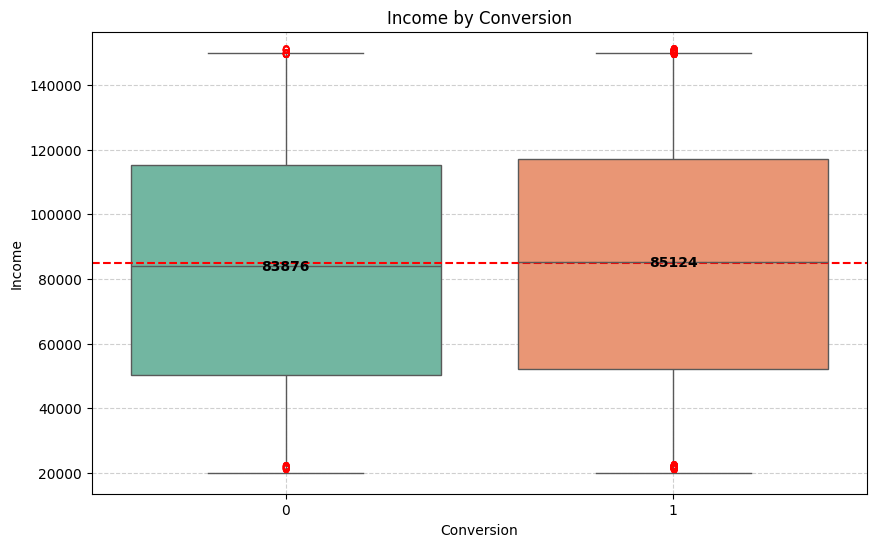

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Conversion', y='Income', palette='Set2')
plt.title('Income by Conversion')
plt.xlabel('Conversion')
plt.ylabel('Income')

medians = df.groupby(['Conversion'])['Income'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.0f}', ha='center', va='center', fontweight='bold', color='black')

outliers = df[(df['Income'] > df['Income'].quantile(0.99)) | (df['Income'] < df['Income'].quantile(0.01))]
for i, row in outliers.iterrows():
    plt.text(row['Conversion'], row['Income'], 'o', color='red', ha='center')

global_median = df['Income'].median()
plt.axhline(global_median, color='red', linestyle='--', label=f'Global Median: {global_median:.0f}')
plt.grid(False, linestyle='--', alpha=0.6)
plt.show()

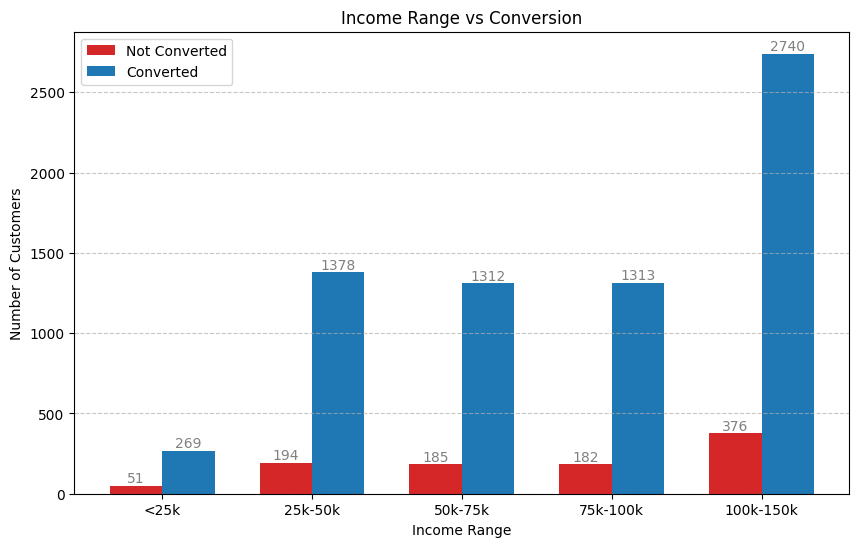

In [ ]:
# Define income bins and labels
income_bins = [0, 25000, 50000, 75000, 100000, 150000]
income_labels = ['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k']

df['Income Range'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)
income_conversions = df.groupby(['Income Range', 'Conversion'])['Income'].count().unstack(fill_value=0)

x = np.arange(len(income_conversions.index))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, income_conversions[0], width, label='Not Converted', color='#d62728')
rects2 = ax.bar(x + width/2, income_conversions[1], width, label='Converted', color='#1f77b4')

# Labels and Title
ax.set_xlabel('Income Range')
ax.set_ylabel('Number of Customers')
ax.set_title('Income Range vs Conversion')
ax.set_xticks(x)
ax.set_xticklabels(income_conversions.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, f'{height}',
        ha='center', va='bottom', fontsize=10, color='#808080'
    )

ax.legend()
plt.xticks(rotation=0)
plt.show()

>
* **100k-150k:** Highest conversions
* **25k-30k:** Second highest
* **75k-100k:** Third highest
* **50k-75k:** Fourth highest
* **<25kyears:** Lowest conversions






#### **Customer Engagement Metrics**


##### **1. Website Visits**

* Calculating the number of returning visitors
* Analysing the percentage of returning and non-returning visitors
* Analysing website visits by Campaign Type and Campaign Channel



* **Returning Visitors**: To monitor returning visitors, you can track the number of unique users who visit your website more than once

In [ ]:
returning_visitors = len(df[df['WebsiteVisits'] > 1])
print(f"Number of Returning Visitors: {returning_visitors}")

Number of Returning Visitors: 7700


* **Returning Visitors v/s Non Returning Visitors**

In [ ]:
returning_visitors = len(df[df['WebsiteVisits'] > 1])
non_returning_visitors = len(df) - returning_visitors

data = {
    "Visitor Type": ["Returning Visitors", "Non-Returning Visitors"],
    "Number of Visitors": [returning_visitors, non_returning_visitors]
}

fig = px.pie(data, values='Number of Visitors', names='Visitor Type', hole=0.5, color_discrete_sequence=['#002060', '#00B0F0'])

fig.update_layout(title_font=dict(size=16), legend_title="Visitor Type",
                  legend=dict(orientation="h", yanchor="top", y=-0.1, xanchor="center", x=0.5)
                 )

fig.update_traces(textinfo='percent+label', textposition='inside', pull=[0, 0.1])

for i, val in enumerate(data["Visitor Type"]):
    if val == "Non-Returning Visitors":
        fig.data[0].textinfo = "percent+label"
        fig.data[0].textposition = "outside"

fig.show()

* **Website Visits by Campaign Type**: To monitor the number of webvisits by Campaign Type

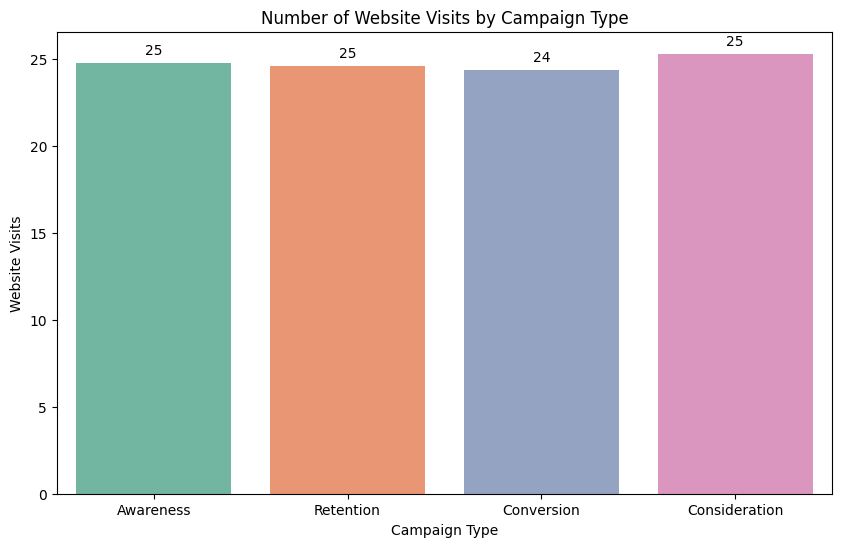

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="WebsiteVisits", data=df, ci=None, palette='Set2')
plt.title('Number of Website Visits by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Website Visits')

# Adding average values above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.grid(False)
plt.show()

* **Website Visits by Campaign Channel**: To monitor the number of webvisits by Campaign Channel

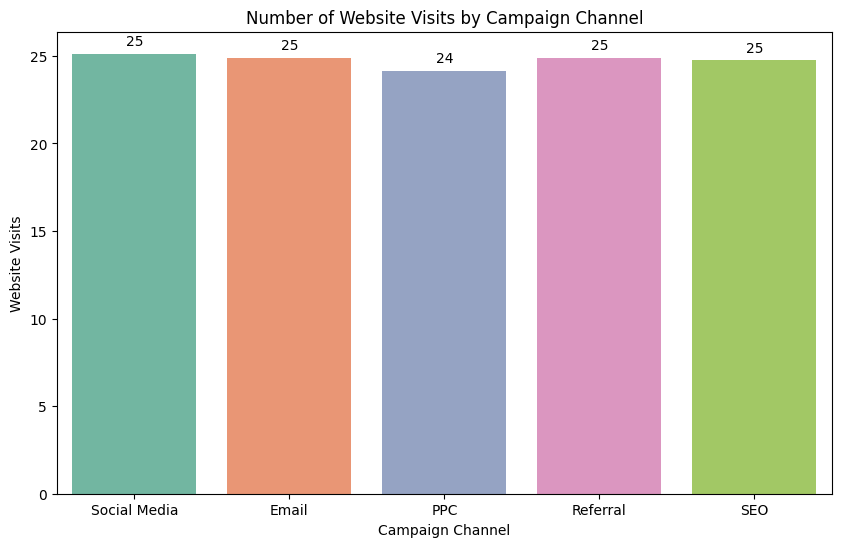

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignChannel", y="WebsiteVisits", data=df, ci=None, palette='Set2')
plt.title('Number of Website Visits by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Website Visits')

# Adding average values above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.grid(False)
plt.show()

##### **2. Previous Purchases**

* Understand repeat purchase behavior by analyzing how many times customers made purchases
* Analysing the repeat purchase distribution

* **Number of Repeat Purchases**

In [ ]:
repeat_purchase_count = len(df[df['PreviousPurchases'] > 1])
print(f"Number of Repeat Purchases: {repeat_purchase_count}")

Number of Repeat Purchases: 6368


* **Repeat Purchase Distribution**

In [ ]:
non_repeat_purchase_count = len(df) - repeat_purchase_count

data = {
    "Purchase Type": ["Repeat Purchases", "Non-Repeat Purchases"],
    "Count": [repeat_purchase_count, non_repeat_purchase_count]
}

fig = px.pie(data, values='Count', names='Purchase Type',
             title='<b>Repeat Purchase Distribution</b>',
             hole=0.5,  # Create a donut chart
             color_discrete_sequence=['#002060', '#00B0F0'])

fig.update_layout(title_font=dict(size=16), title_x=0.5, legend_title="Purchase Type")
fig.update_traces(textinfo='percent+label', textposition='outside', pull=[0, 0.1])
fig.show()


##### **3. Email Engagement:**

* Measure email opens, clicks, and conversions based on available data (e.g., ‘EmailOpens’, ‘EmailClicks’, ‘Conversion’)
* Analysing the average email engagement by conversion


* **Average Email Opens and Email Clicks**

In [ ]:
avg_email_opens = df['EmailOpens'].mean()
avg_email_clicks = df['EmailClicks'].mean()
print(f"Avg Email Opens: {avg_email_opens:.2f}")
print(f"Avg Email Clicks: {avg_email_clicks:.2f}")

Avg Email Opens: 9.48
Avg Email Clicks: 4.47


* **Average Email Engagement by Conversion**

In [ ]:
avg_email_engagement = df.groupby('Conversion')[['EmailOpens', 'EmailClicks']].mean().reset_index()
avg_email_engagement['Conversion'] = avg_email_engagement['Conversion'].map({1: 'Converted Users', 0: 'Non-Converted Users'})
avg_email_engagement = avg_email_engagement.melt(id_vars=['Conversion'], var_name='Metric', value_name='Value')

# Create a bar chart
fig = px.bar(avg_email_engagement,
             x='Metric',
             y='Value',
             color='Conversion',
             barmode='group',
             color_discrete_map={'Converted Users':'#002060', 'Non-Converted Users':'#00B0F0'},
             title="<b>Average Email Engagement by Conversion</b>",
             text='Value')

# Customize the layout
fig.update_layout(
    xaxis_title="Email Engagement Metric",
    yaxis_title="Average Value",
    title_font=dict(size=16),
    title_x=0.5,
    legend_title="Conversion Status"
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

##### **4. Loyality Points**

* Analysing the average loyality points distribution by Conversion

* **Average Loyality Points by Conversion**

In [ ]:
# Calculate average loyalty points for converted and non-converted users
avg_loyalty_points_converted = df[df['Conversion'] == 1]['LoyaltyPoints'].mean()
avg_loyalty_points_non_converted = df[df['Conversion'] == 0]['LoyaltyPoints'].mean()

data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average Loyalty Points": [avg_loyalty_points_converted, avg_loyalty_points_non_converted]
}

fig = px.bar(data, x='Conversion Status', y='Average Loyalty Points',
             color='Conversion Status',
             color_discrete_sequence=['#002060', '#00B0F0'],
             title="<b>Average Loyalty Points</b>",
             text='Average Loyalty Points')

# Customize the layout
fig.update_layout(
    xaxis_title="Conversion Status",
    yaxis_title="Average Loyalty Points",
    title_font=dict(size=16),
    title_x=0.5  # Center the title
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

##### **5. Click-Through Rate (CTR):**

* Calculating the CTR as the percentage of clicks relative to impressions (views)
* Analysing the average CTR by COnversion

* **Calcuting Average CTR**

In [ ]:
ctr = (df['ClickThroughRate'].sum() / len(df)) * 100
print(f"Click-Through Rate (CTR): {ctr:.2f}%")

Click-Through Rate (CTR): 15.48%


* **Average Click Through Rate By Conversion**

In [ ]:
# Calculate average time spent on site for converted and non-converted users
avg_CTR_converted = df[df['Conversion'] == 1]['ClickThroughRate'].mean()
avg_CTR_non_converted = df[df['Conversion'] == 0]['ClickThroughRate'].mean()

data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average ClickThroughRate": [avg_CTR_converted, avg_CTR_non_converted]
}

fig = px.bar(data, x='Conversion Status', y='Average ClickThroughRate',
             color='Conversion Status',
             color_discrete_sequence=['#002060', '#00B0F0'],
             title="<b>Average Click Through Rate</b>",
             text='Average ClickThroughRate')

fig.update_layout(xaxis_title="Conversion Status", yaxis_title="Average Click Through Rate",
title_font=dict(size=16), title_x=0.5
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

##### **6. PagesPerVisit**

* Anlaysing the PagesPerVisit by Conversion, Campaign Type, Campaign Channel and Gender
* Calculating Bounce Rate

* **Average PagesPerVisit By Conversion**

In [ ]:
# Calculate average pages per visit for converted and non-converted users
avg_pages_converted = df[df['Conversion'] == 1]['PagesPerVisit'].mean()
avg_pages_non_converted = df[df['Conversion'] == 0]['PagesPerVisit'].mean()

# Prepare data for the plot
data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average Pages Per Visit": [avg_pages_converted, avg_pages_non_converted]
}

fig = px.bar(data, x='Conversion Status', y='Average Pages Per Visit',
             color='Conversion Status',
             color_discrete_sequence=['#002060', '#00B0F0'],
             title="<b>Average Pages Per Visit</b>",
             text='Average Pages Per Visit')

fig.update_layout(
    xaxis_title="Conversion Status",
    yaxis_title="Average Pages Per Visit",
    title_font=dict(size=16),
    title_x=0.5  # Center the title
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

* **Average PagesPerVisit By Campaign Type**

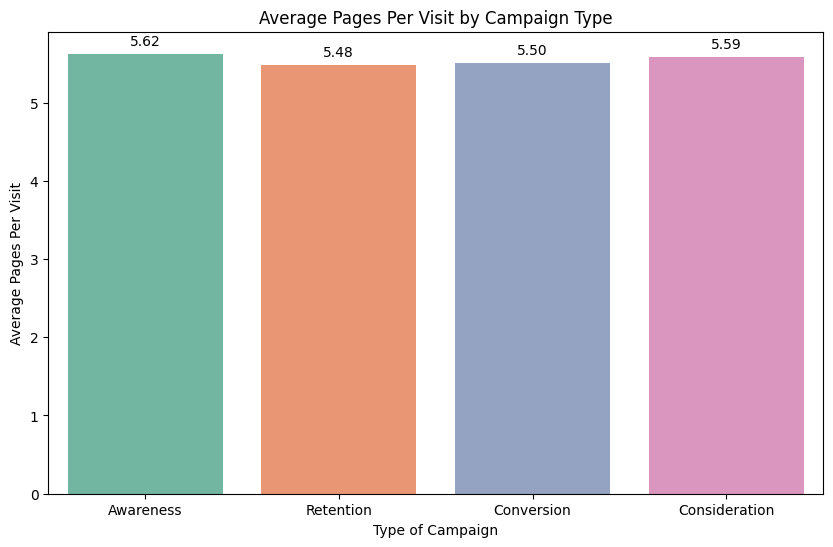

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="PagesPerVisit", data=df, ci=None, palette='Set2')
plt.title('Average Pages Per Visit by Campaign Type')
plt.xlabel('Type of Campaign')
plt.ylabel('Average Pages Per Visit')

# Adding average values ​​above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.grid(False)
plt.show()

* **Average PagesPerVisit By Campaign Channel**

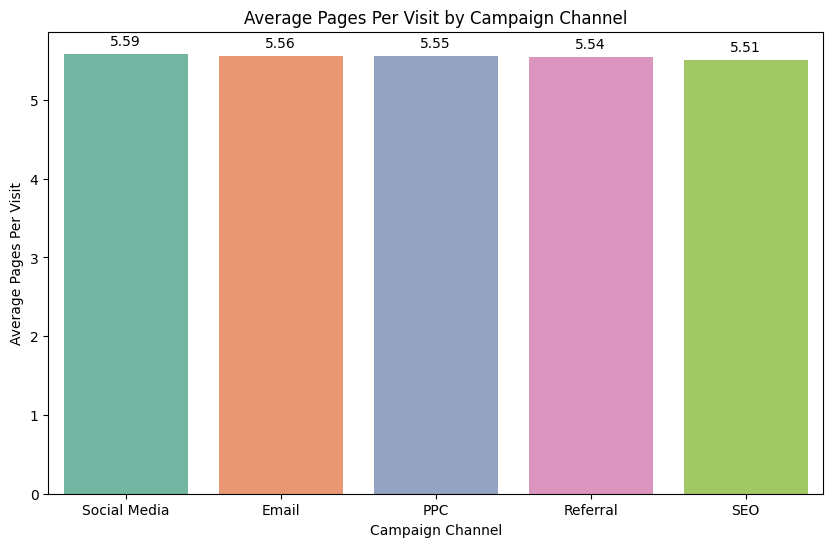

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignChannel", y="PagesPerVisit", data=df, ci=None, palette='Set2')
plt.title('Average Pages Per Visit by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Average Pages Per Visit')

# Adding average values ​​above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.grid(False)
plt.show()

* **Average PagesPerVisit By Gender**

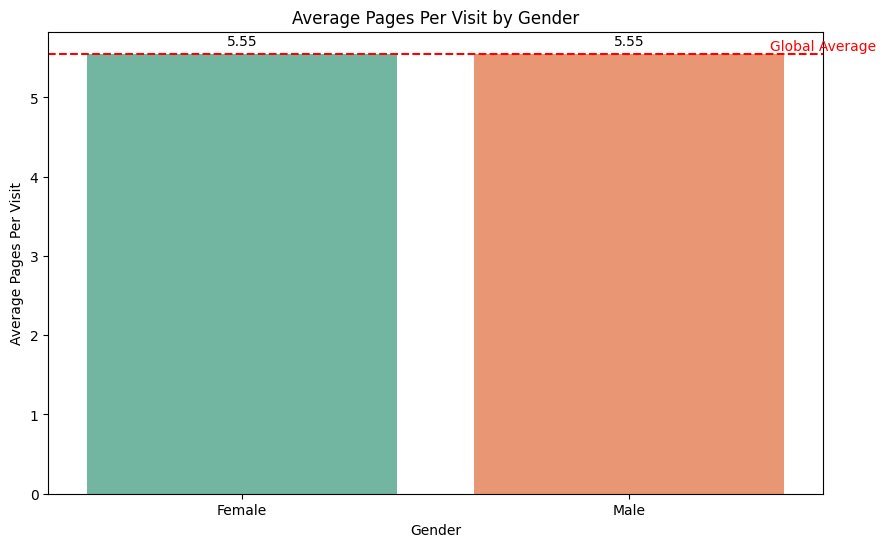

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Gender", y="PagesPerVisit", data=df, ci=None, palette='Set2')
plt.title('Average Pages Per Visit by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Pages Per Visit')

# Adding average values above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Adding a global average line
mean_value = df['PagesPerVisit'].mean()
ax.axhline(mean_value, color='red', linestyle='--')
ax.text(1.5, mean_value + 0.05, 'Global Average', color='red', ha='center')

plt.grid(False)
plt.show()

* **Calculting Bounce Rate:** Calculate the bounce rate as the percentage of single-page visits

In [ ]:
bounce_rate = (df['PagesPerVisit'] == 1).mean() * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

Bounce Rate: 0.00%


> A Bounce Rate of 0.00% in your marketing campaign data most likely indicates a data quality issue rather than a perfect campaign. Here's why:
> * **Unrealistic Scenario:** It's highly improbable that every single visitor interacted with your website in some way. There will always be some visitors who leave immediately without any interaction.
* **Tracking Issues:** A 0% bounce rate might suggest that your website analytics are not set up correctly or there might be glitches in data reporting. This could be due to faulty tracking codes or errors in how user interactions are captured


**WHAT TO DO NEXT:**

> **Investigate Analytics Setup:** Double-check your website analytics setup to ensure accurate tracking. Look for Other Metrics - While a bounce rate of zero might seem positive, analyze other metrics like conversion rate and time on site to get a better understanding of user engagement. Remember, a bounce rate isn't the sole indicator of a successful marketing campaign. It's crucial to analyze it along with other website analytics to get a comprehensive picture of user behavior.Here are some alternative interpretations of a very low bounce rate (not necessarily 0%):
* **Highly Relevant Audience:** If your target audience is very specific
and well-defined, a very low bounce rate could indicate you're reaching the right people who are interested in your offering.
* **Engaging Landing Page:** A well-designed landing page with a clear call to action might lead to a lower bounce rate as users find the information they're looking for and take the desired action.



##### **8. Time Spent on Site**

* Analysing the average time spent on time by Conversion

* **Average Time Spent on Site by Conversion**

In [ ]:
# Calculate average time spent on site for converted and non-converted users
avg_time_converted = df[df['Conversion'] == 1]['TimeOnSite'].mean()
avg_time_non_converted = df[df['Conversion'] == 0]['TimeOnSite'].mean()

data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average Time Spent (minutes)": [avg_time_converted, avg_time_non_converted]
}

fig = px.bar(data, x='Conversion Status', y='Average Time Spent (minutes)',
             color='Conversion Status',
             color_discrete_sequence=['#002060', '#00B0F0'],
             title="<b>Average Time Spent on Site</b>",
             text='Average Time Spent (minutes)')

fig.update_layout(xaxis_title="Conversion Status", yaxis_title="Average Time Spent (minutes)",
title_font=dict(size=16), title_x=0.5
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

##### **9. Social Shares**

* Analysing the average social shares by Conversion

* **Average Social Shares by Conversion**

In [ ]:
# Calculate average social shares for converted and non-converted users
avg_social_shares_converted = df[df['Conversion'] == 1]['SocialShares'].mean()
avg_social_shares_non_converted = df[df['Conversion'] == 0]['SocialShares'].mean()

data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average Social Shares": [avg_social_shares_converted, avg_social_shares_non_converted]
}

fig = px.bar(data, x='Conversion Status', y='Average Social Shares',
             color='Conversion Status',
             color_discrete_sequence=['#002060', '#00B0F0'],
             title="<b>Average Social Shares</b>",
             text='Average Social Shares')

fig.update_layout(
    xaxis_title="Conversion Status",
    yaxis_title="Average Social Shares",
    title_font=dict(size=16),
    title_x=0.5  # Center the title
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

#### **Insights**

> * **Age:** The age group 35-44 has the highest conversions, followed by the age group 25-34 with second highest conversions
* **Gender:** Females represent the highest conversions with over 60% of the total conversions, followed by Males with 40% Conversions
* **Income:** The income range of 100k-150k has the maximum number of conversions whereas the conversions in other ranges are relatively low

> * **Click-Through Rate (CTR):** Higher average for converting users
* **Email Clicks:** More clicks on emails by converting users
* **Email Opens:** Converting users to open more emails
* **Pages Per Visit:** Higher for converting users
* **Social Shares:** Slightly lower for converting users but could be useful when combined with other metrics
* **Time on Site:** Converting users spend more time on the site








### **Campaign Effectiveness Metrics**

##### **1. Conversion and Conversion Rate**

* Calculate the conversion rate as the percentage of users who converted (Eg: made a purchase) divided by the total number of users
* Analysing conversions by Campaign Type and Campaign Channel

* **Conversion Rate**

In [ ]:
# Conversion Rate
conversion_rate = df['Conversion'].sum() / len(df) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 87.65%


In [ ]:
converted_users = df['Conversion'].sum()
non_converted_users = len(df) - converted_users

# Calculate conversion rate
conversion_rate = (converted_users / len(df)) * 100

data = {
    "Conversion Status": ["Converted", "Not Converted"],
    "Number of Users": [converted_users, non_converted_users]
}

# Create the donut chart
fig = px.pie(data, values='Number of Users', names='Conversion Status', hole=0.5,
             title='<b>Conversion Status</b>', color_discrete_sequence=['#002060', '#00B0F0'])

fig.update_layout(
    title_font=dict(size=16),
    legend_title="Conversion Status",
    legend=dict(orientation="h", yanchor="top", y=-0.1, xanchor="center", x=0.5),
    title_x=0.5  # Center the title horizontally
)

fig.update_traces(textinfo='percent', textposition='inside', pull=[0, 0.1],
    textfont=dict(size=18, family="Arial Black", color="white")
)

fig.show()

* **Conversions by Campaign Types**

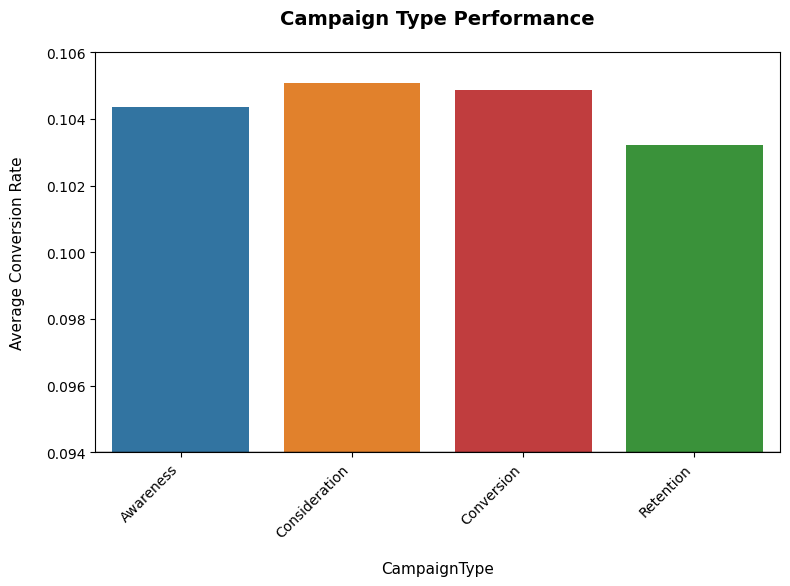

In [ ]:
feature = 'CampaignType'

# Calculate the average conversion rate per campaign type
avg_conversion = df.groupby(feature)['ConversionRate'].mean().reset_index()

custom_palette = ['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c']

plt.figure(figsize=(8, 6))
sns.barplot(x=feature, y='ConversionRate', data=avg_conversion, palette=custom_palette)

plt.ylabel("Average Conversion Rate", fontsize=11, labelpad=15)
plt.xlabel(feature, fontsize=11, labelpad=15)
plt.title('Campaign Type Performance', fontsize=14, weight='bold', y=1.05)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0.094, 0.106)
plt.yticks(np.arange(0.094, 0.107, 0.002), fontsize=10)
plt.axhline(0.094, color='black', linewidth=1)
plt.tight_layout()
plt.show()

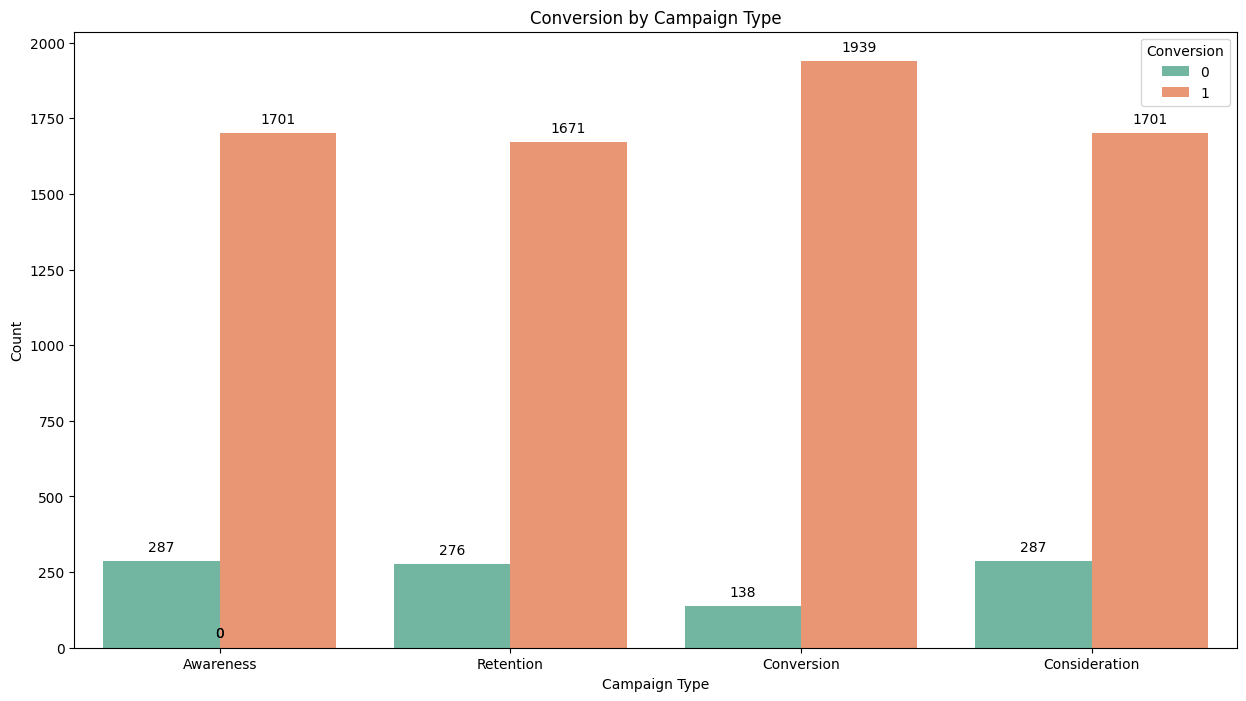

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df, x='CampaignType', hue='Conversion', palette='Set2')
plt.title('Conversion by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Count')

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.grid(False)
plt.show()

> **CONVERSION RATES FOR CAMPAIGN TYPES**
* **Consideration Campaigns:** Highest average conversion rate
* **Conversion Campaigns:** Second highest
* **Awareness Campaigns:** Slightly lower but still effective
* **Retention Campaigns:** Lowest conversion rate among the types but still valuable for long-term engagement



* **Conversions by Campaign Channels**

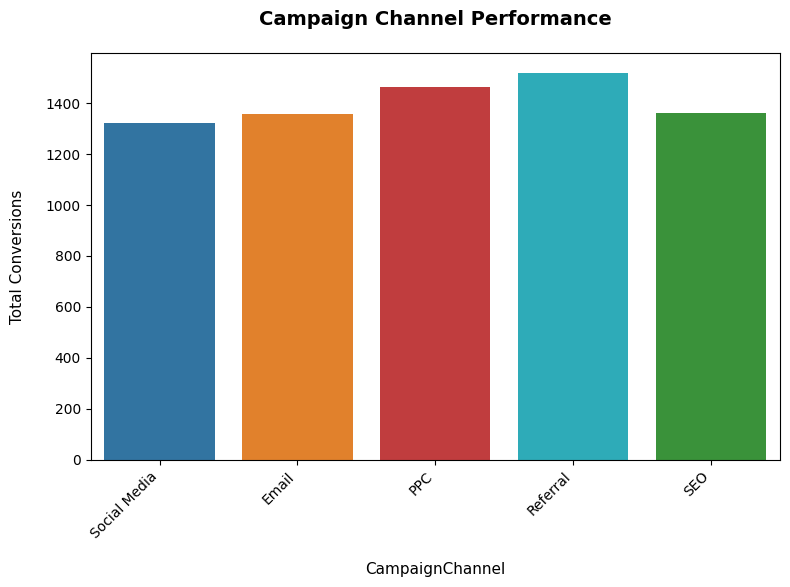

In [ ]:
feature = 'CampaignChannel'

converted_customers = df[df['Conversion'] == 1]

custom_palette = ['#1f77b4', '#ff7f0e', '#d62728', '#17becf', '#2ca02c']

plt.figure(figsize=(8, 6))
sns.countplot(x=feature, data=converted_customers, palette=custom_palette)

plt.ylabel("Total Conversions", fontsize=11, labelpad=15)
plt.xlabel(feature, fontsize=11, labelpad=15)
plt.title('Campaign Channel Performance', fontsize=14, weight='bold', y=1.05)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

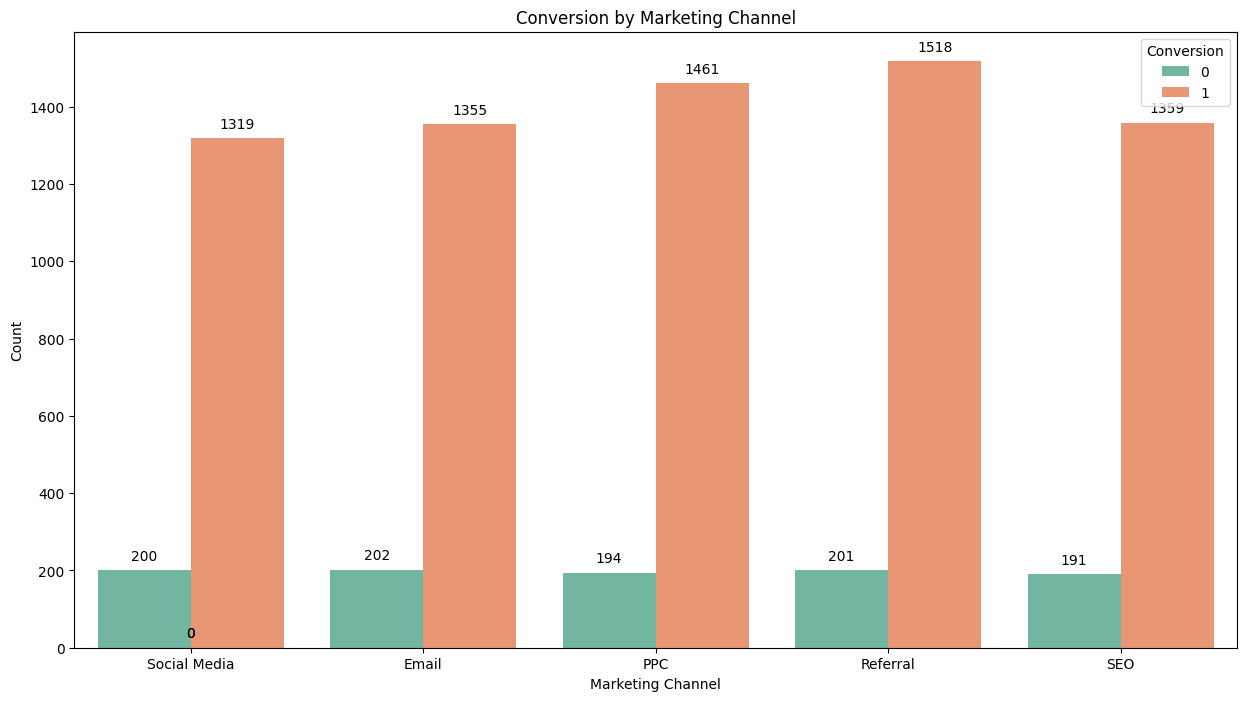

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df, x='CampaignChannel', hue='Conversion', palette='Set2')
plt.title('Conversion by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Count')

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.grid(False)
plt.show()

> **TOP PERFORMING CHANNELS**
* **Referral:** Highest number of conversions
* **PPC:** Second highest conversions
* **SEO:** Close third in conversions
* **Email:** High but slightly lower than the above
* **Social Media:** Lowest conversions among the listed channels

##### **2. AdSpend Analysis**

* Analysing the ApSend with Conversion Rate
* Anlaysing the cost breakdown by Campaign Channel and Campaign Type

* **Ad Spend vs. Conversion:** To plot the relationship between advertising spend and conversion

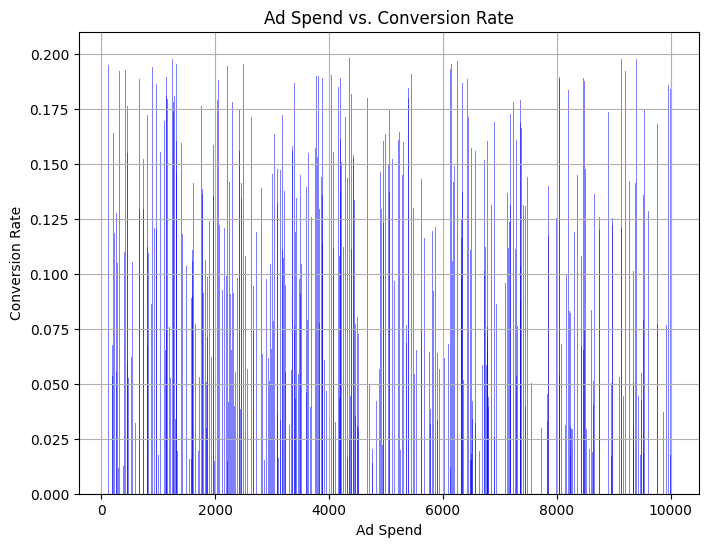

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(df['AdSpend'], df['ConversionRate'], color='b', alpha=0.5)
plt.xlabel("Ad Spend")
plt.ylabel("Conversion Rate")
plt.title("Ad Spend vs. Conversion Rate")
plt.grid(True)
plt.show()



> **No Clear Trend:** The points are scattered without a clear pattern, suggesting no strong correlation between ad spend and conversion rate within the data range presented.

> **Variability in Conversion Rate:** Conversion rates vary widely at different ad spend levels, indicating that factors other than ad spend may significantly influence conversion rates.



* **Cost Breakdown by Campaign Channel**


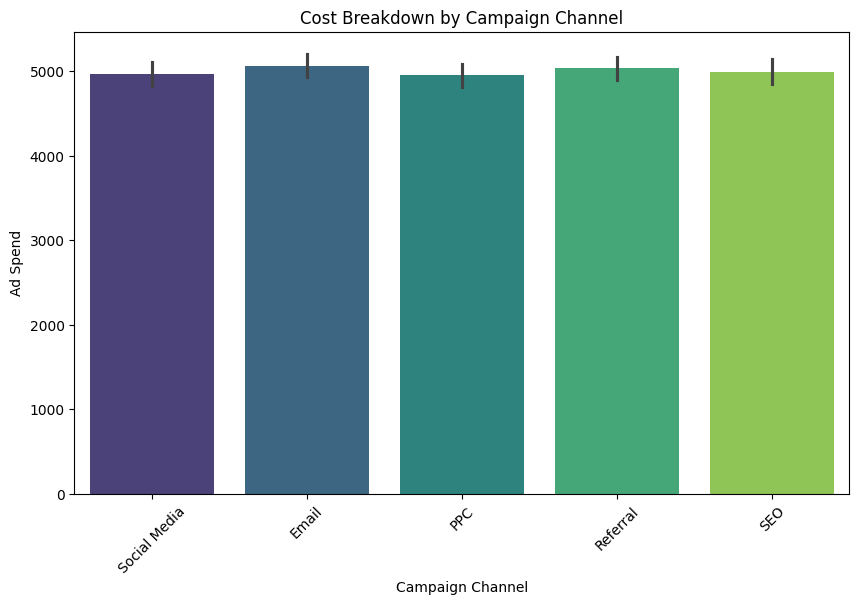

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CampaignChannel', y='AdSpend', data=df, palette='viridis')
plt.xlabel("Campaign Channel")
plt.ylabel("Ad Spend")
plt.title("Cost Breakdown by Campaign Channel")
plt.xticks(rotation=45)
plt.show()


* **Cost Breakdown by Campaign Type**


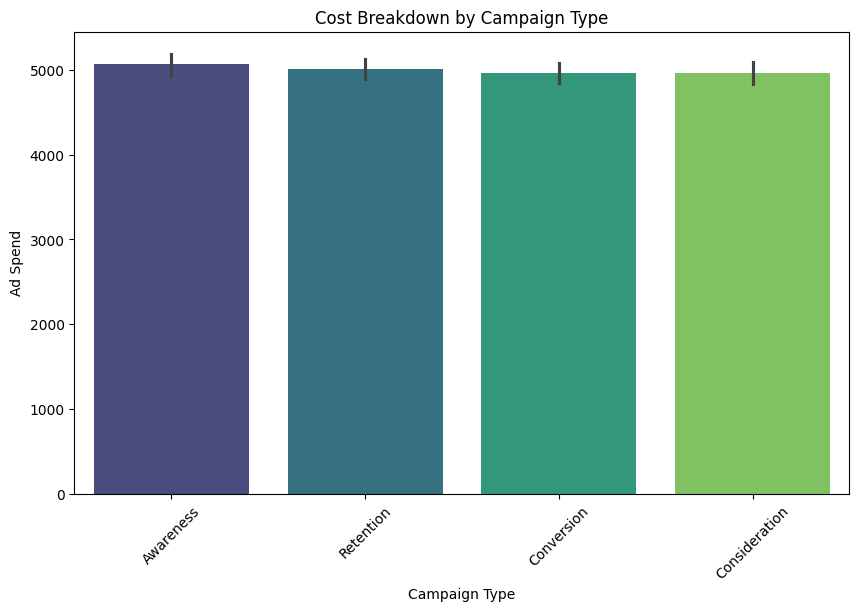

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CampaignType', y='AdSpend', data=df, palette='viridis')
plt.xlabel("Campaign Type")
plt.ylabel("Ad Spend")
plt.title("Cost Breakdown by Campaign Type")
plt.xticks(rotation=45)
plt.show()


##### **3. Cost per Acquisition & Average Transaction Value**

* Calculate the CPA by dividing the total campaign cost by the number of acquired customers
* Calculate the average transaction value (e.g., average purchase amount) based on available data




* **Cost per Acquisition (CPA)**


In [ ]:
total_cost = df['AdSpend'].sum()
total_customers = len(df[df['Conversion'] == 1])
cpa = total_cost / total_customers
print(f"Cost per Acquisition (CPA): ${cpa:.2f}")

Cost per Acquisition (CPA): $5705.58




* **Average Transaction Value:**



In [ ]:
avg_transaction_value = df1.groupby('CustomerID')['AdSpend'].sum().mean()
clv_alternative = avg_transaction_value
print(f"Alternative Estimated CLV (Avg. Transaction Value): ${clv_alternative:.2f}")

Alternative Estimated CLV (Avg. Transaction Value): $5000.94


##### **4. Return on Investment (ROI)**

* Calculate the ROI by comparing the revenue generated (e.g., from conversions) to the campaign cost. Since there are no specific revenue column, ROI can be estimated using alternative approaches




* **Average Revenue per Conversion:** Calculate the average revenue generated per conversion (assuming we have a total revenue value for the entire campaign)



In [ ]:
total_revenue = 100000  # Replace with your actual total revenue
total_conversions = len(df[df['Conversion'] == 1])
avg_revenue_per_conversion = total_revenue / total_conversions
roi_alternative = (avg_revenue_per_conversion - total_cost) / total_cost * 100
print(f"Alternative ROI (Avg. Revenue per Conversion): {roi_alternative:.2f}%")

Alternative ROI (Avg. Revenue per Conversion): -100.00%


> A negative ROI (Avg. Revenue per Conversion) of -100.00% indicates that the marketing campaign is generating a significant loss. This means that, on average, the cost of acquiring a conversion is greater than the revenue generated from that conversion. In other words, for every dollar spent on marketing, the campaign is losing $1.





In [ ]:
df = df.drop(['Age Range', 'Income Range'], axis=1)

### **Correlation Matrix of Variables with Conversion**

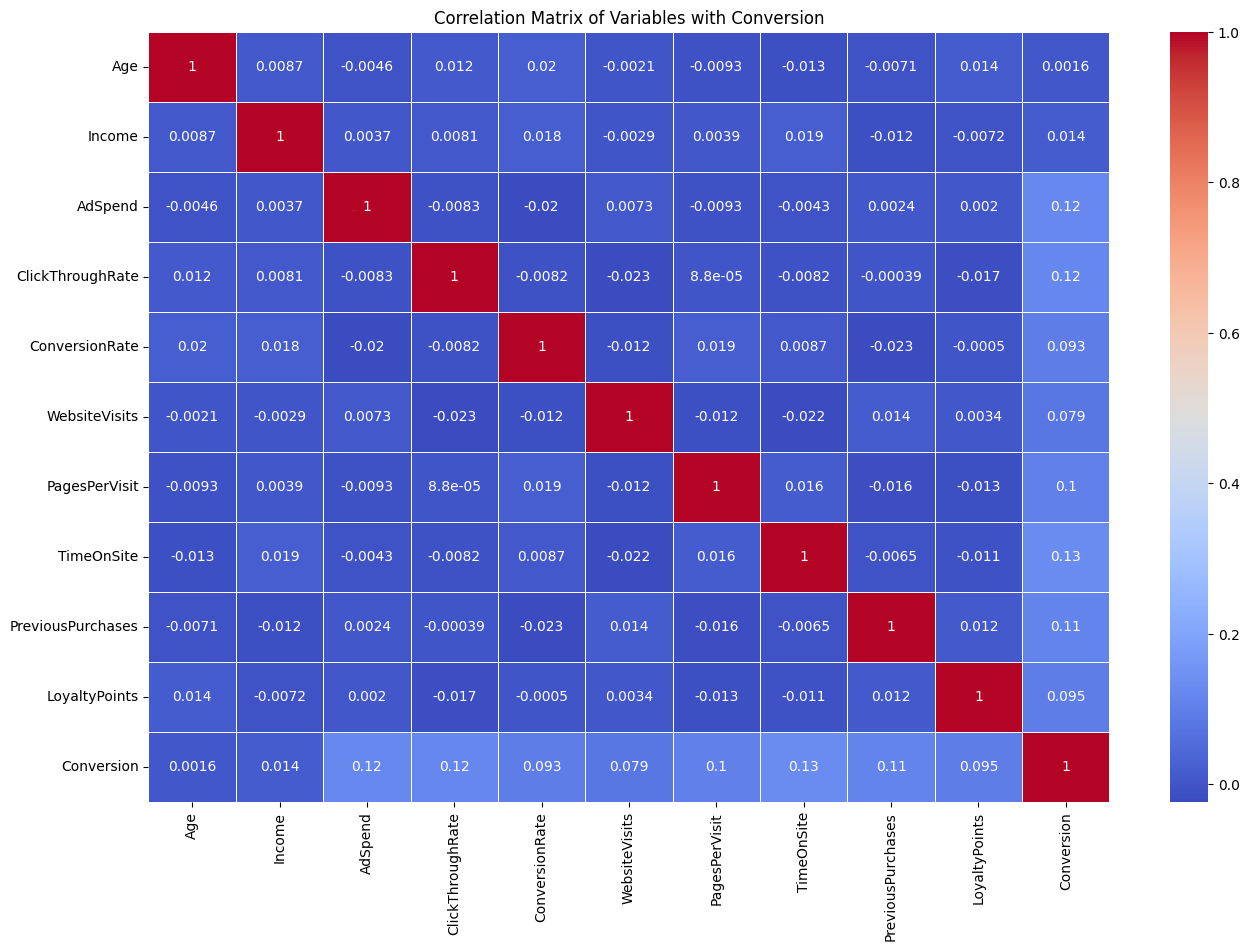

In [ ]:
plt.figure(figsize=(15.5, 10))
corr_matrix = df[['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables with Conversion')
plt.show()

The correlation matrix shows the correlation coefficients between various features and the target variable Conversion. Here's a breakdown of the key observations:

**1. Correlation with Conversion:**

* **AdSpend (0.12):** There is a moderate positive correlation between AdSpend and Conversion. This suggests that higher spending on ads is somewhat associated with a higher likelihood of conversion.

* **ClickThroughRate (0.12):** ClickThroughRate also has a moderate positive correlation with Conversion, indicating that as the click-through rate increases, the likelihood of conversion slightly increases as well.

* **TimeOnSite (0.13):** Time spent on the website has a slightly stronger correlation with Conversion, suggesting that users who spend more time on the site are more likely to convert.

* **PagesPerVisit (0.10):** The number of pages visited per session shows a small positive correlation with conversion, indicating that users who browse more pages are marginally more likely to convert.

* **ConversionRate (0.093):** This shows a weak positive correlation, which is expected as it is related directly to conversion.

* **LoyaltyPoints (0.095):** Loyalty points are also weakly correlated with conversion, implying that customers who convert might have a slightly higher tendency to accumulate loyalty points.

**2. Inter-feature Correlations:**

* **Income and Age:** These two variables have a very low positive correlation (0.0087), indicating that there is almost no relationship between a customer's age and income in this dataset.

* **PagesPerVisit and TimeOnSite:** The correlation (0.016) is positive but very low, suggesting that visiting more pages doesn’t necessarily mean spending more time on the site.

* **PreviousPurchases and LoyaltyPoints:** The correlation (0.012) is positive and very weak, suggesting that customers who make previous purchases might accumulate loyalty points, but the relationship is not strong.

**3. Low Correlation Values:**

* Most of the correlations between the features themselves are quite low, typically near 0, which suggests that there is minimal multicollinearity among the features. This is generally good for regression models, as it indicates that the features are not highly dependent on each other.

**KEY INSIGHTS:**

* The features AdSpend, ClickThroughRate, and TimeOnSite show the highest positive correlations with Conversion, though these correlations are still relatively weak. This suggests that while these factors are associated with higher conversion rates, they are not strong predictors on their own.

* The weak correlations between most of the variables suggest that each variable might contribute uniquely to the conversion prediction, which could be beneficial when building a predictive model.

**CONCLUSION:**

* While some variables show positive correlations with conversion, the overall weak correlations imply that no single variable strongly drives conversion on its own. This indicates that a combination of multiple factors is likely necessary to accurately predict conversion, and machine learning models that consider the interactions between these variables may be more effective than relying on any single metric.



#### **Positive Correlation Analysis**

* **Income x Age (0.087):** There is a weak positive correlation between Income and Age. This suggests that as age increases, income slightly increases as well. However, the correlation is quite low, indicating that age alone is not a strong predictor of income in this dataset.

* **Income x ClickThroughRate (0.081):** This weak positive correlation indicates that customers with higher incomes tend to have a slightly higher click-through rate. Again, while there is a relationship, it is not particularly strong.

* **AdSpend x WebsiteVisits (0.073):** The positive correlation here suggests that higher ad spending is associated with a slight increase in website visits. This makes intuitive sense as more advertising typically leads to more traffic, but the low correlation indicates that other factors also play a significant role in driving website visits.

* **ClickThroughRate x Income (0.081):** Reiterating from point 2, this suggests that wealthier customers tend to click on ads slightly more often, but this relationship is weak.

* **ConversionRate x TimeOnSite (0.087):** There is a weak positive correlation between ConversionRate and TimeOnSite, implying that customers who spend more time on the site are slightly more likely to convert. This is expected, as more engaged users (those who spend more time) are generally more likely to take action.

* **ConversionRate x ConversionRate (0.093):** This indicates a strong internal consistency within the ConversionRate variable itself, which is expected.

* **WebsiteVisits x ConversionRate (0.079):** A weak positive correlation suggests that more website visits are slightly associated with a higher conversion rate. This makes sense, as more visits provide more opportunities for conversion, but the weak correlation indicates that merely driving traffic is not enough to ensure conversions.

* **TimeOnSite x ConversionRate (0.087):** Reiterating from point 5, this correlation suggests that the amount of time spent on the site has a positive relationship with the conversion rate.

* **LoyaltyPoints x Conversion (0.095):** There is a weak positive correlation between LoyaltyPoints and Conversion. This suggests that customers who convert are slightly more likely to accumulate loyalty points, which could indicate that loyal customers are more likely to convert, or that conversions lead to the earning of loyalty points.

* **Conversion x ConversionRate (0.093):** This strong positive correlation is expected as Conversion and ConversionRate are directly related.

* **Conversion x WebsiteVisits (0.079):** This weak positive correlation suggests that customers who convert tend to visit the website more often, but again, the correlation is low, indicating that frequent visits alone do not guarantee conversion.

* **Conversion x LoyaltyPoints (0.095):** Reiterating from point 9, this suggests a weak relationship where customers who convert tend to accumulate more loyalty points.



#### **Summary of Correlation Heatmap Analysis**

* **Overall Weak Correlations:** The correlations are generally weak, suggesting that while there are relationships between these variables, they are not strong predictors on their own.

* **Insight into Behavior:** Variables like TimeOnSite, WebsiteVisits, and LoyaltyPoints have some association with conversion-related metrics, hinting at customer engagement and loyalty playing a role in conversions, though not in a dominant way.

* **Implications for Modeling:** These weak correlations suggest that a model predicting conversion should likely consider multiple factors together rather than relying on any single metric.



> For more accurate predictions or insights, these variables may need to be combined into a more complex model that captures interactions and non-linear relationships, which are not evident through simple correlations.


### **Insights**

* This data highlights the importance of referral and PPC channels, targeting the 35–44 age group, focusing on consideration campaigns, and engaging more with female users. Email engagement is crucial, and higher interaction times and page visits are strong indicators of conversions

> #### **Recommendations**

* **Improve Ad Creatives:** Boost CTR by making ads more engaging
* **Enhance Website Content:** Encourage more page visits and longer time on site
* **Optimize Email Campaigns:** Increase opens and clicks with better subject lines and email content

* Focusing on these areas and regularly monitoring the metrics can improve the marketing strategies and drive more conversions, leading to better results for the client








#**Data Preprocessing**

* Clean the data by handling missing values, converting variables to appropriate data types, and addressing any data quality issues

* Splits data into training and testing sets

### **Handling Missing Values & Outliers**

In [ ]:
total_missing = df.isnull().sum().sum()
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 0


### **Handling Categorical Columns**

In [ ]:
# Selecting the columns that will be transformed using OneHotEncoding
columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType']

# Creating the OneHotEncoder with drop='first' to avoid multicollinearity
onehotencoder = OneHotEncoder(drop='first', sparse_output=False)

# Using ColumnTransformer to apply OneHotEncoder only to the categorical columns
column_transformer = ColumnTransformer(transformers=[('cat',
                                                      onehotencoder,
                                                      columns_to_encode)],
                                       remainder='passthrough'
                                      )

# Fitting and transforming the data
data_encoded = column_transformer.fit_transform(df)

# Viewing the ColumnTransformer object
column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Gender', 'CampaignChannel',
                                  'CampaignType'])])

In [ ]:
# Obtaining the names of the new columns after OneHotEncoding
encoded_columns = column_transformer.named_transformers_['cat'].get_feature_names_out(columns_to_encode)

# Creating a DataFrame with all columns (OneHotEncoded + the columns that were not transformed)
all_columns = list(encoded_columns) + [col for col in df.columns if col not in columns_to_encode]
data_encoded_df = pd.DataFrame(data_encoded, columns=all_columns)

# Viewing the first few rows of the resulting DataFrame
data_encoded_df

Gender_Male  CampaignChannel_PPC  CampaignChannel_Referral  \
0            0.00                 0.00                      0.00   
1            1.00                 0.00                      0.00   
2            0.00                 1.00                      0.00   
3            0.00                 1.00                      0.00   
4            0.00                 1.00                      0.00   
...           ...                  ...                       ...   
7995         1.00                 0.00                      0.00   
7996         0.00                 0.00                      0.00   
7997         0.00                 0.00                      1.00   
7998         0.00                 1.00                      0.00   
7999         0.00                 0.00                      0.00   

      CampaignChannel_SEO  CampaignChannel_Social Media  \
0                    0.00                          1.00   
1                    0.00                          0.00   
2                    0.00                          0.00   
3                    0.00                          0.00   
4                    0.00                          0.00   
...                   ...                           ...   
7995                 0.00                          0.00   
7996                 1.00                          0.00   
7997                 0.00                          0.00   
7998                 0.00                          0.00   
7999                 0.00                          0.00   

      CampaignType_Consideration  CampaignType_Conversion  \
0                           0.00                     0.00   
1                           0.00                     0.00   
2                           0.00                     0.00   
3                           0.00                     1.00   
4                           0.00                     1.00   
...                          ...                      ...   
7995                        0.00                     0.00   
7996                        0.00                     0.00   
7997                        1.00                     0.00   
7998                        1.00                     0.00   
7999                        0.00                     0.00   

      CampaignType_Retention   Age    Income  ...  ConversionRate  \
0                       0.00 56.00 136912.00  ...            0.09   
1                       1.00 69.00  41760.00  ...            0.18   
2                       0.00 46.00  88456.00  ...            0.08   
3                       0.00 32.00  44085.00  ...            0.09   
4                       0.00 60.00  83964.00  ...            0.11   
...                      ...   ...       ...  ...             ...   
7995                    0.00 21.00  24849.00  ...            0.12   
7996                    1.00 43.00  44718.00  ...            0.19   
7997                    0.00 28.00 125471.00  ...            0.13   
7998                    0.00 19.00 107862.00  ...            0.14   
7999                    0.00 31.00  93002.00  ...            0.06   

      WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  \
0              0.00           2.40        7.40         19.00        6.00   
1             42.00           2.92        5.35          5.00        2.00   
2              2.00           8.22       13.79          0.00       11.00   
3             47.00           4.54       14.69         89.00        2.00   
4              0.00           2.05       13.99          6.00        6.00   
...             ...            ...         ...           ...         ...   
7995          23.00           9.69       14.23         70.00       13.00   
7996          49.00           9.50        3.50         52.00       13.00   
7997          35.00           2.85       14.62         38.00       16.00   
7998          49.00           1.00        3.88         86.00        1.00   
7999          15.00           6.96       12.76          2.00       18.00   

     

In [ ]:
#Columns in the encoded dataframe
data_encoded_df.columns

Index(['Gender_Male', 'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Consideration', 'CampaignType_Conversion',
       'CampaignType_Retention', 'Age', 'Income', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints', 'Conversion'],
      dtype='object')

In [ ]:
# Check the total size of the DataFrame
print(data_encoded_df.shape)

(8000, 22)


### **Splitting the Data**

* This involves splitting the data into training and test sets. This division allows for evaluating the model's performance on unseen data during training, helping to avoid overfitting and assess the model's generalization capability.

* In practice, it is common to adopt a standard split, such as the popular 80% for training and 20% for testing. This division ensures that the model is trained on a substantial amount of data while still having a significant portion for evaluation.

* This practice of data splitting is fundamental to ensure that the model is robust and capable of generalizing to new, unseen data during training.

In [ ]:
X = data_encoded_df.drop("Conversion", axis=1) # Drop the target column to get the features
y = data_encoded_df["Conversion"] # Set the target column

In [ ]:
# Visualize rows and column x
X.shape

(8000, 21)

In [ ]:
# Visualize rows and column y
y.shape

(8000,)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", y_train.shape)

Rows and columns of training data X_train: (6400, 21)
Rows and columns of training data y_train: (6400,)


#**Model Training**

* Implementing the machine learning models for training and testing

* Feature Importance of the Best 4 Models

* Analysing the SHAP Plots

### **Model Implementation**


* **Decision Tree:** A model that uses a tree structure to represent hierarchical decision rules

* **Random Forest:** An ensemble learning technique that combines multiple decision trees to improve model accuracy and robustness

* **AdaBoost:** Another ensemble learning algorithm that iteratively adjusts the weights of observations to focus on the most challenging cases.

* **Gradient Boosting:** An ensemble learning technique that builds decision trees sequentially, optimizing a specific loss criterion.

* **XGBoost:** An efficient implementation of gradient boosting, known for its speed and superior performance.

* **LightGBM:** Another implementation of gradient boosting, designed to train models quickly and with efficient memory usage.

* **CatBoost:** An advanced gradient boosting algorithm that natively handles categorical features and reduces overfitting, providing high accuracy and fast training times.


In [ ]:
# Implementing Machine Learning models
models = [
            # Decision Tree Model
            ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),

            # Random forest model
            ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),

            # Gradient Boosting Classifier
            ("GradientBoostingClassifier", GradientBoostingClassifier(random_state=42)),

            # Ada Boost Model
            ("AdaBoostClassifier", AdaBoostClassifier(random_state=45)),

            # XGBoost Model
            ("XGBClassifier", XGBClassifier(tree_method='hist', random_state=42)),

            # LightGBM Model
            ("LGBMClassifier", LGBMClassifier(num_leaves=31,
                              boosting_type='gbdt',
                              bagging_fraction=0.9,
                              learning_rate=0.05,
                              feature_fraction=0.9,
                              bagging_freq=50,
                              verbose=-1,
                              device='cpu')),

            # CatBoost Classifier
            ("CatBoostClassifier", CatBoostClassifier(iterations=1000,
                                learning_rate=0.1,
                                depth=6,
                                verbose=0,
                                random_state=42))]


model_names = []
training_accuracies = []
testing_accuracies = []

# Evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    model_names.append(name)
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

accuracy_df = pd.DataFrame({
    "Model": model_names,
    "Training Accuracy": training_accuracies,
    "Testing Accuracy": testing_accuracies
})

accuracy_df = accuracy_df.sort_values('Testing Accuracy', ascending=False)
accuracy_df_styled = accuracy_df.style.background_gradient(subset=['Testing Accuracy'], cmap='summer_r')
accuracy_df_styled



> It is evident that the best 4 models in Train and Test are **CatBoost, Gradient Boosting, LGBM** and **XGBoost**



### **Feature Importance**

* This involves measuring the importance of each feature during model training for a machine learning model in making predictions or classifications. In other words, it is a way to quantify the impact or contribution of each feature to the decisions made by the model.

* This is done by observing how each feature influences the decisions made by the model when dividing the data into decision tree nodes or by weighing the features in other model structures.

* This information can be used to optimize the model, remove irrelevant or redundant features, identify important factors for prediction, and even assist in interpreting the model's results

* Evaluating the feature importances of the best 4 models

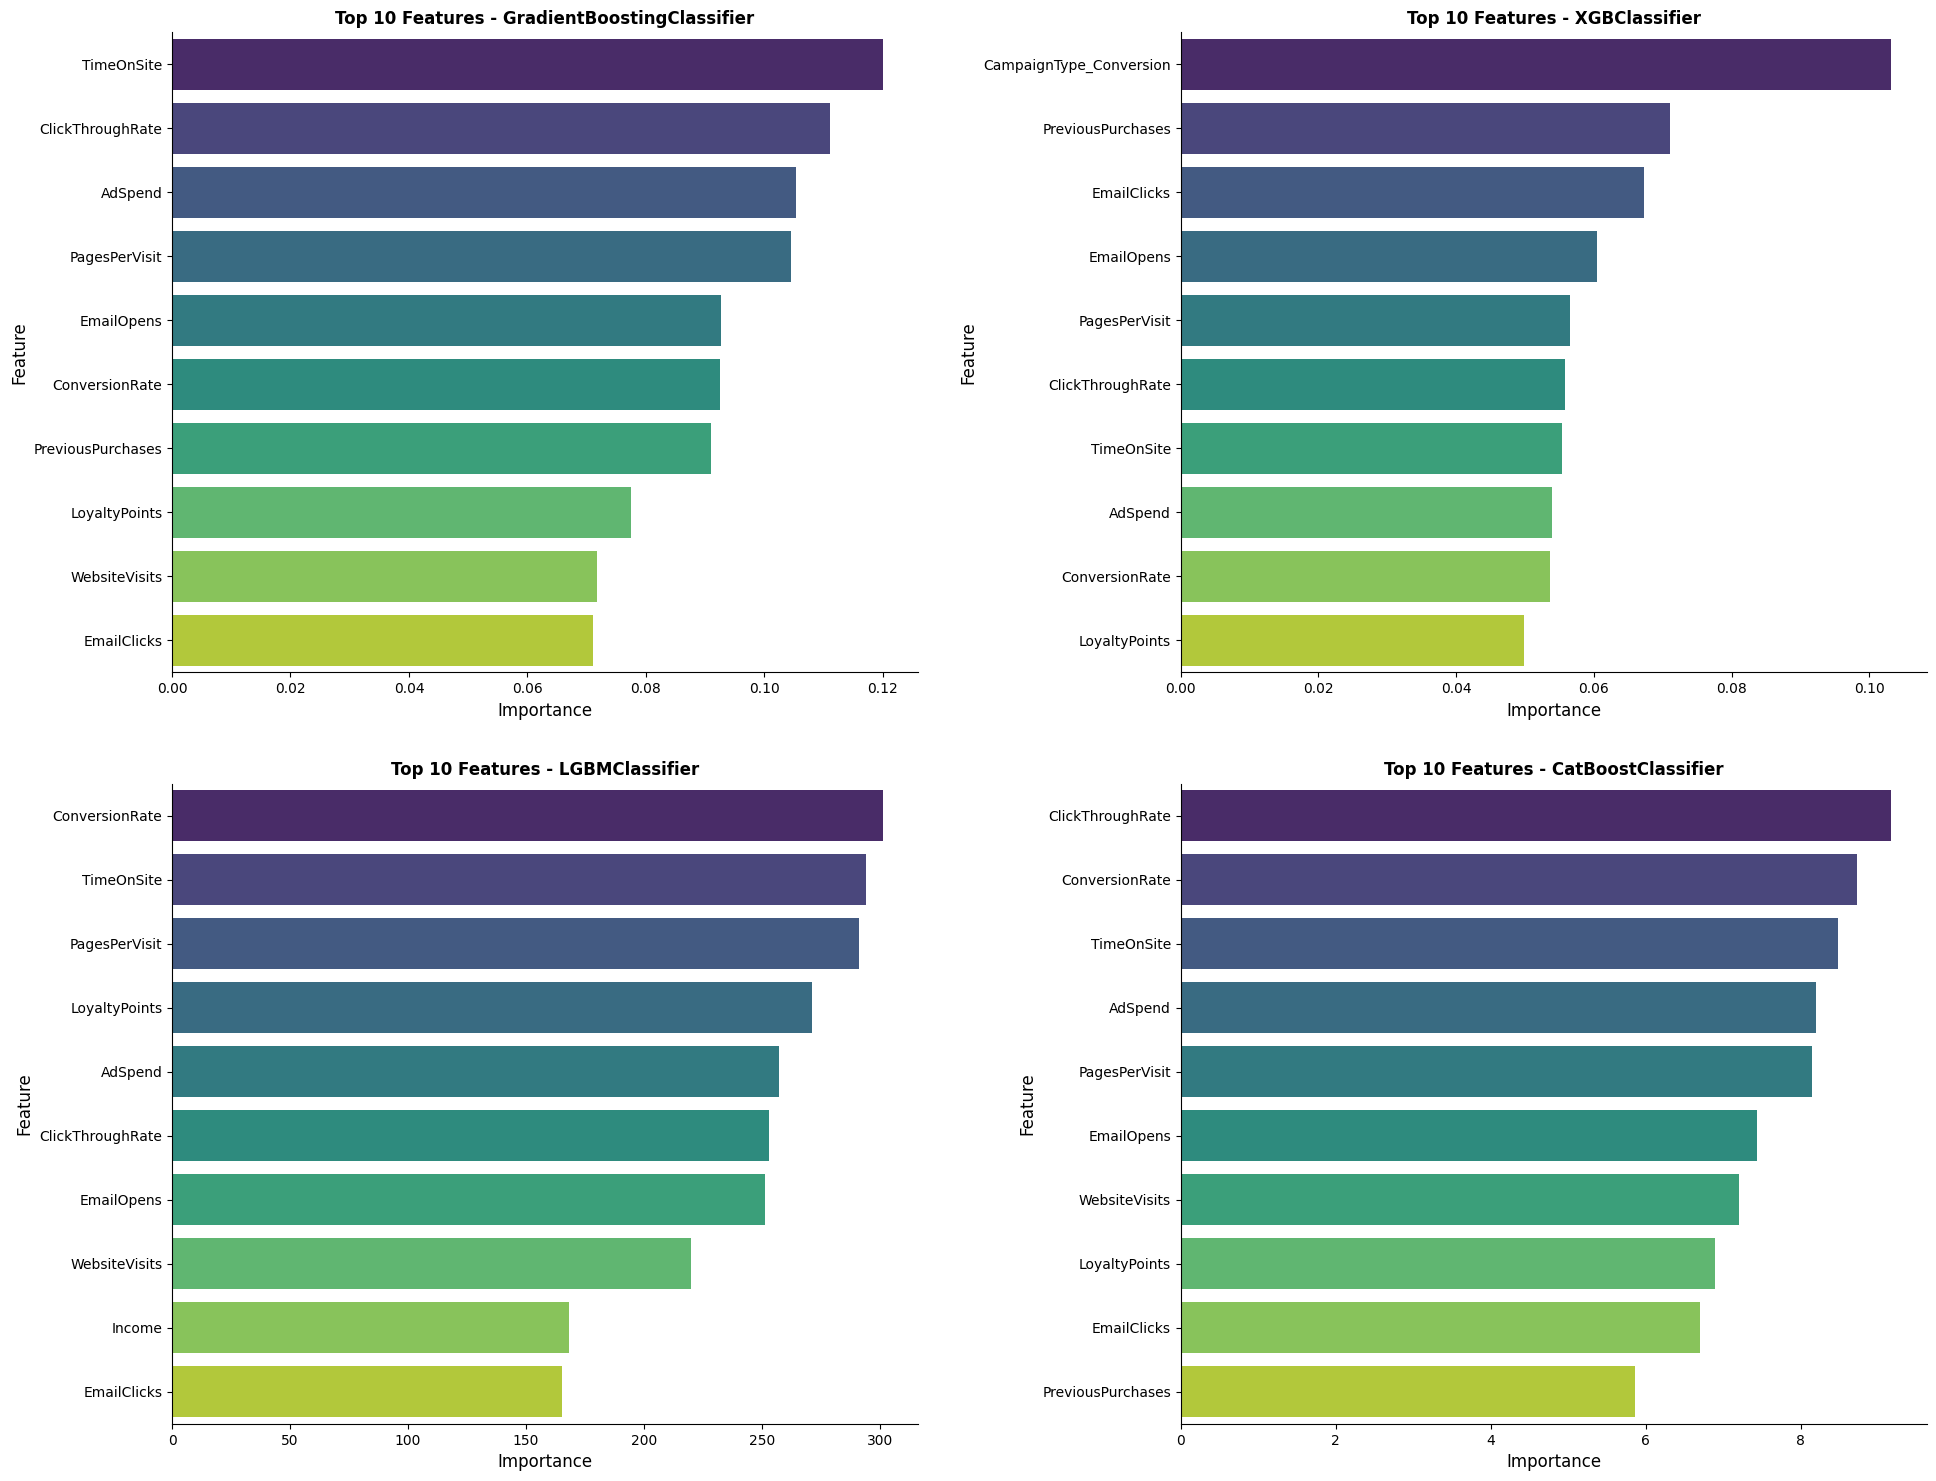

In [ ]:
# Calculate feature importances for models that support it

best_models = [(name, model) for name, model in models
               if name not in ("RandomForestClassifier", "AdaBoostClassifier", "DecisionTreeClassifier")]

feature_importances_list = []
model_names_list = []

for model_name, model in best_models:
    feature_importances = None
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'get_feature_importance'):
        feature_importances = model.get_feature_importance()

    if feature_importances is not None:
        feature_importances_list.append(feature_importances)
        model_names_list.append(model_name)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))
axes = axes.flatten()

# Plot top 10 features for each model, up to 7
for i in range(min(4, len(feature_importances_list))):
    # Create a DataFrame for feature importances
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_list[i]})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Plot the top 10 features
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Top 10 Features - {model_names_list[i]}", fontweight='bold')
    axes[i].set_xlabel('Importance', fontsize=12)
    axes[i].set_ylabel('Feature', fontsize=12)
    axes[i].grid(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

for i in range(4, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

These plots display the top 10 features based on their importance scores across various models: GradientBoostingClassifier, XGBClassifier, LGBMClassifier and CatBoostClassifier

**1. GradientBoostingClassifier**

* **Top Feature:** TimeOnSite.
The TimeOnSite is the most significant feature for GradientBoostingClassifier, indicating that the time spent by the customer on the website has a major impact on conversion predictions

* **Key Features:** ClickThroughRate, Adspend, and PagesPerVisit are highly ranked, suggesting that customer engagement metrics and marketing specific variables are strong predictors for conversion.

* **Broader Feature Set:** GradientBoosting highlights a broader range of features, including AdSpend, PagesPerVisit, EmailClicks, WebsiteVisits and LoyaltyPoints, emphasizing a mix of marketing efforts, customer engagement and customer loyalty.

**2. XGBClassifier**

*   **Top Feature:** CampaignType_Conversion.
The CampaignType_Conversion is the most significant feature for
XGBClassifier, indicating that the type of campaign has a major impact on conversion predictions for this model.

*   **Key Features:** PreviousPurchases, EmailClicks, and EmailOpens are highly ranked, suggesting that past purchasing behavior and engagement with marketing emails are strong predictors for conversion.

* **Broader Feature Set:** XGBClassifier highlights a broader range of features, including AdSpend, ConversionRate, and LoyaltyPoints, emphasizing a mix of marketing efforts and customer loyalty.

**3. LGBMClassifier**

* **Top Feature:** ConversionRate
The ConversionRate is the most influential feature in LGBMClassifier, indicating a strong reliance on this metric for prediction.

* **Other Important Features:** Features such as TimeOnSite, PagesPerVisit, LoyaltyPoints, and AdSpend are also prominent, reinforcing the importance of user engagement metrics, customer loyalty and marketing efforts in this model.

* **Diverse Influences:** The model also considers Income, EmailClicks, WebsiteVisits and EmailOpens, showing a diverse set of influences on the prediction outcome.

**4. CatBoostClassifier**

*   **Top Feature:** ClickThroughRate.
The ClickThroughRate is the most significant feature for
CatBoostClassifier

*   **Key Features:** ConversionRate, TimeOnSite, and AdSpend are highly ranked, suggesting that customer engagement and marketing efforts are strong predictors for conversion.

* **Diverse Influences:** The model also considers PagesPerVisit, EmailOpens, WebsiteVisits and LoyalityPoints, showing a diverse set of influences on the prediction outcome.


**CONCLUSION**

Across most models, features like
TimeOnSite, AdSpend, ClickThroughRate,
PagesPerVisit, and ConversionRate consistently appear as important, indicating that these metrics are crucial across different types of classifiers for predicting conversion.

* **Variability in Feature Importance:** While there is some consistency, the importance of features varies depending on the model. For example, CampaignType_Conversion is highly important in XGBClassifier but not in the others, showing that different models may prioritize different aspects of the data.

* **Model-Specific Insights:** Each model brings unique insights into the data, which can be leveraged for different aspects of marketing strategy optimization.
  * CatBoostClassifier and LGBMClassifier emphasize ConversionRate & TimeOnSite
  * GradientBoostingClassifier gives more importance on engagement metrics like TimeOnSite and ClickThroughRate
  * XGBClassifier gives more importance to CampaignType_Conversion and PreviousPurchases

These feature importance plots provide valuable insights into which factors are driving the predictions in each model. The consistency of certain features across models reinforces their importance, while the variability between models suggests that a combination of different models might provide a more comprehensive understanding of the factors influencing customer conversion.

#### **SHAP Plots**

Model: GradientBoostingClassifier


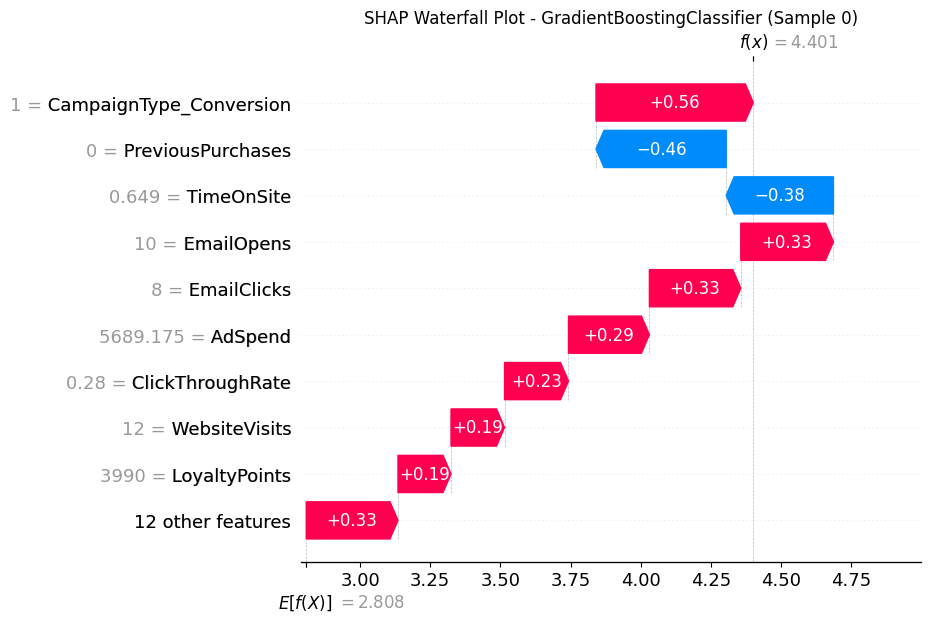

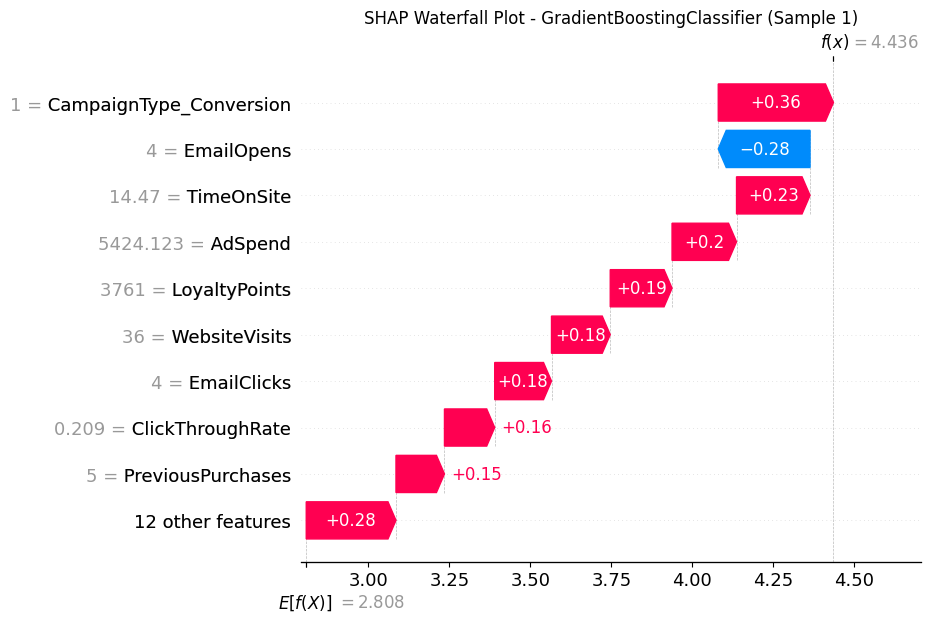

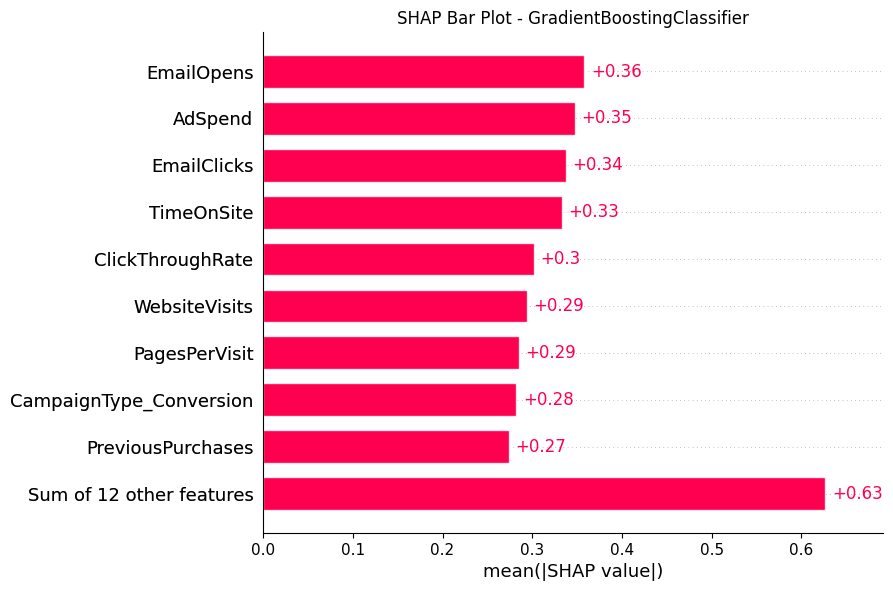

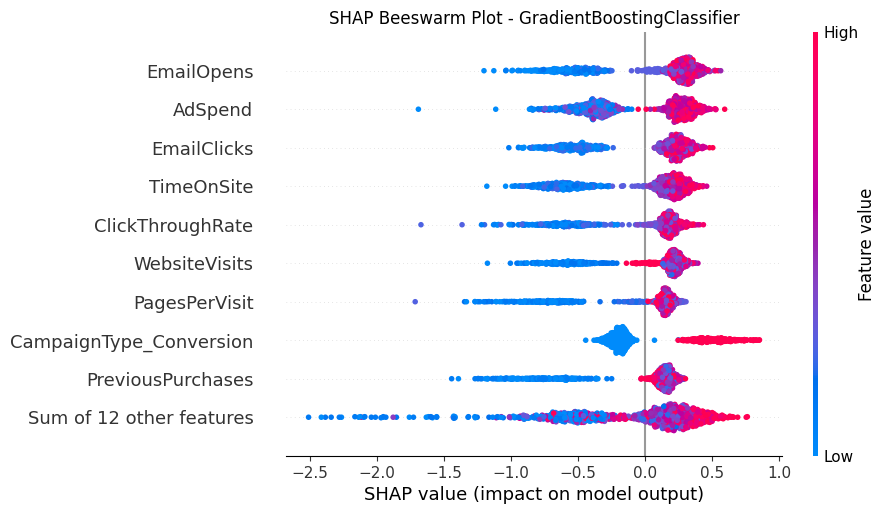

Model: XGBClassifier


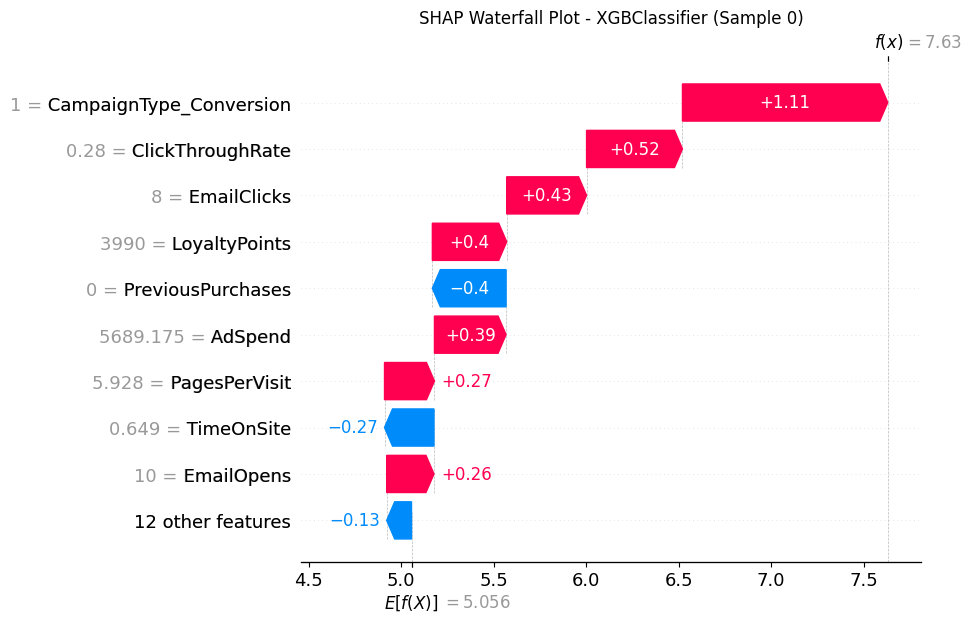

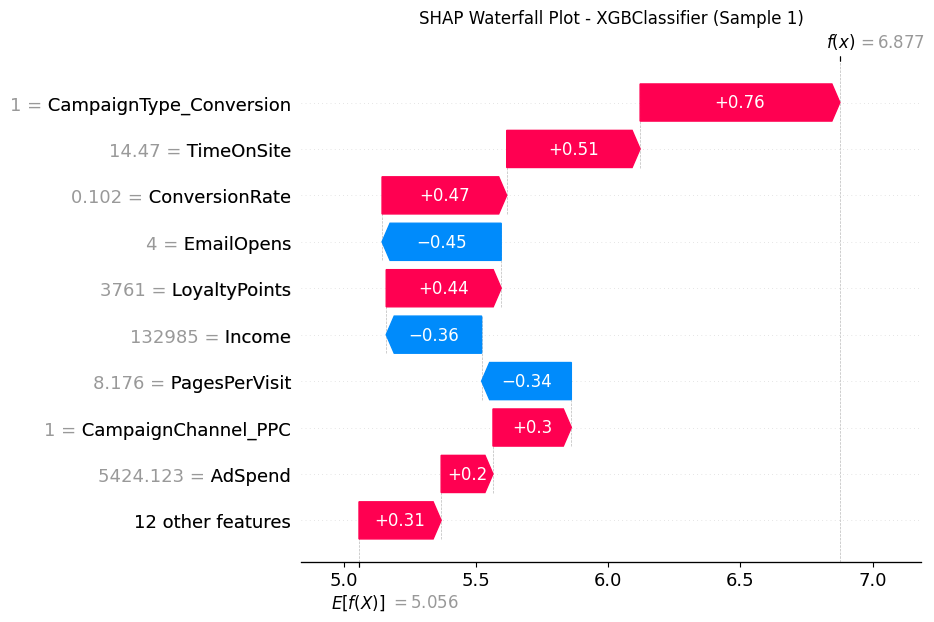

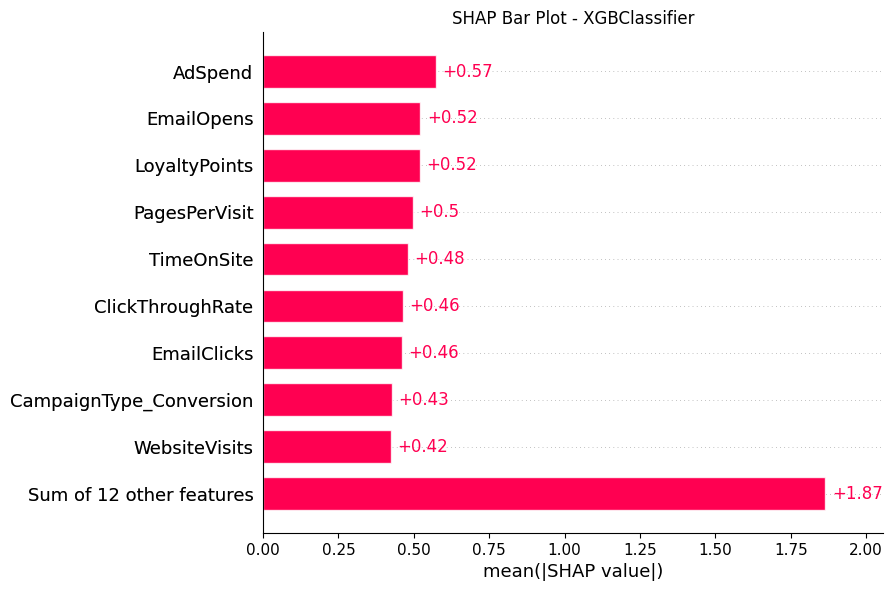

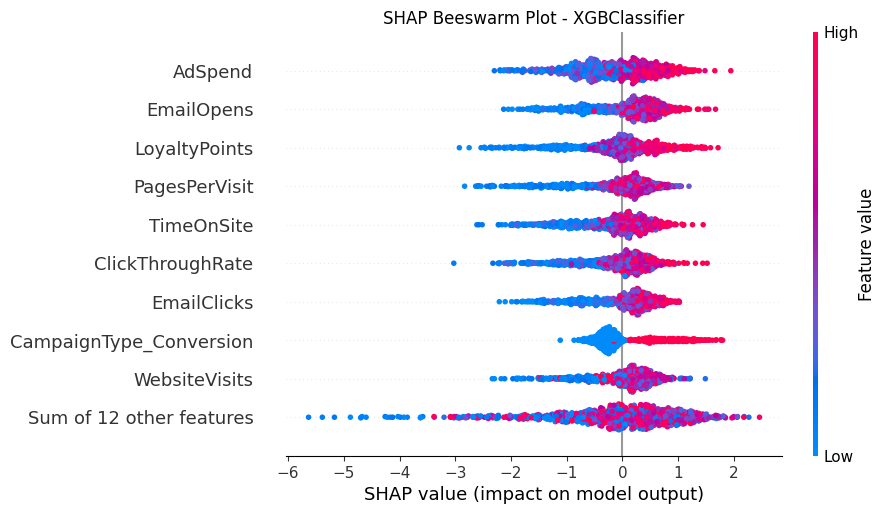

Model: LGBMClassifier


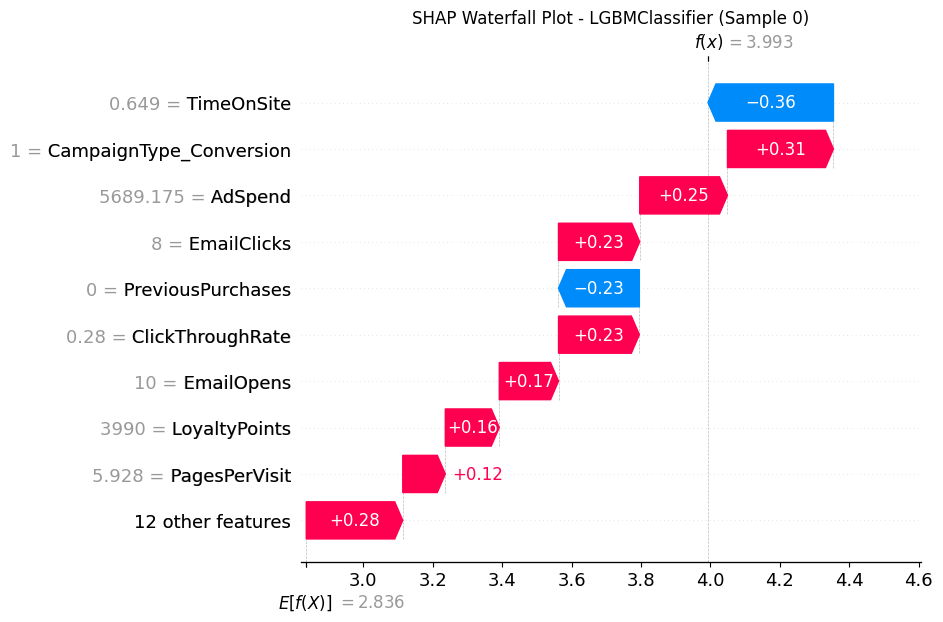

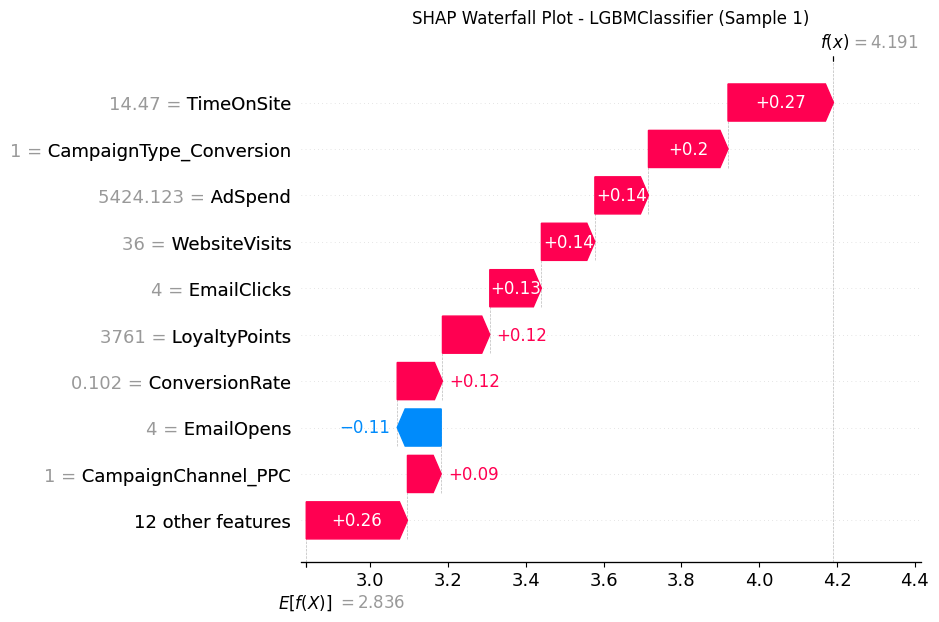

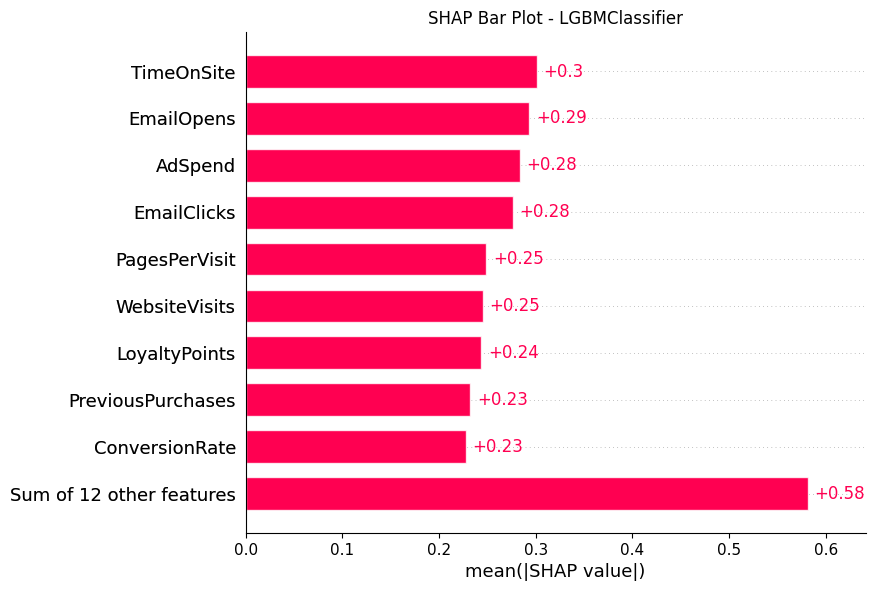

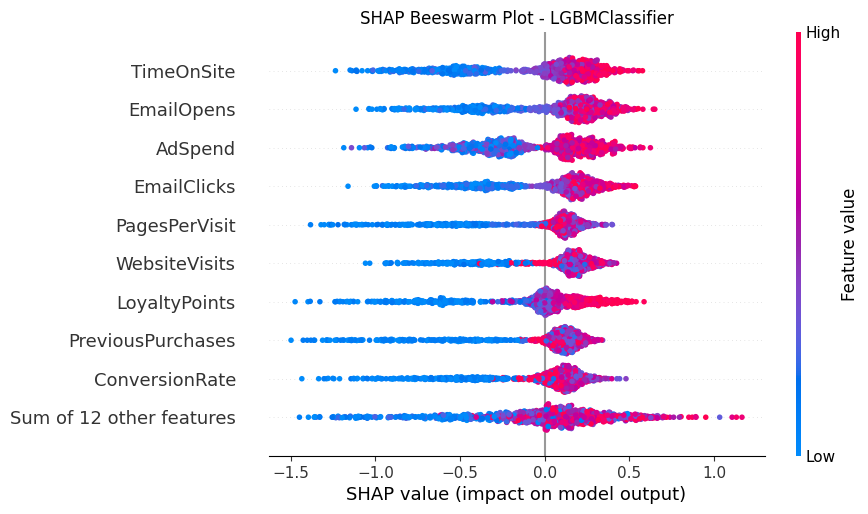

 99%|===================| 986/1000 [01:07<00:00]       

Model: CatBoostClassifier


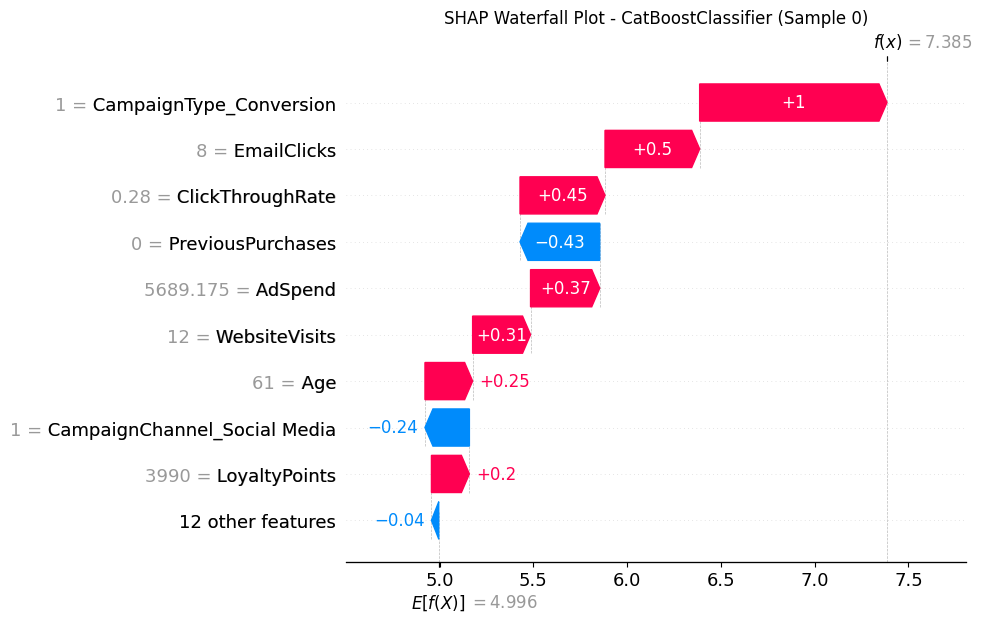

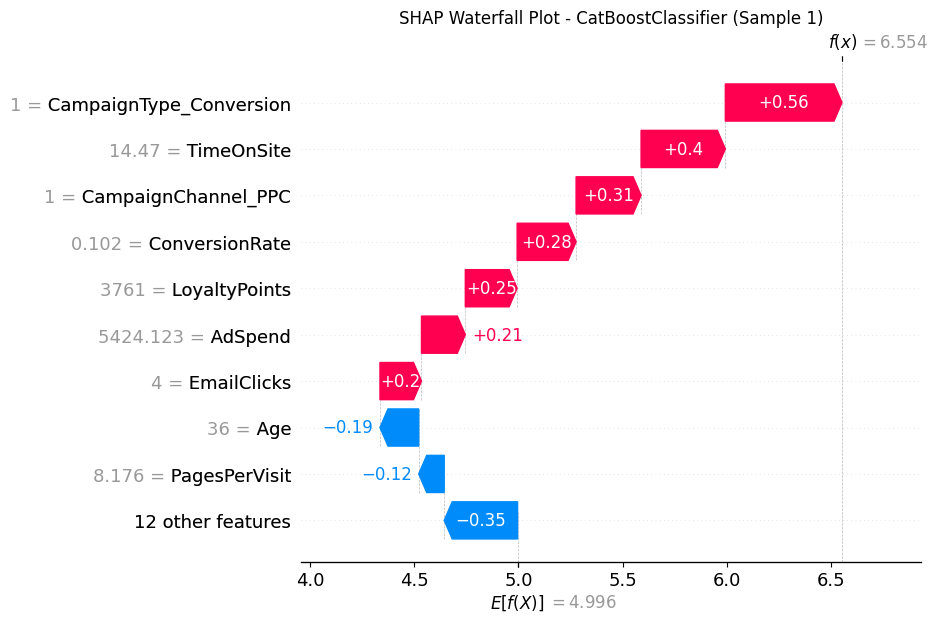

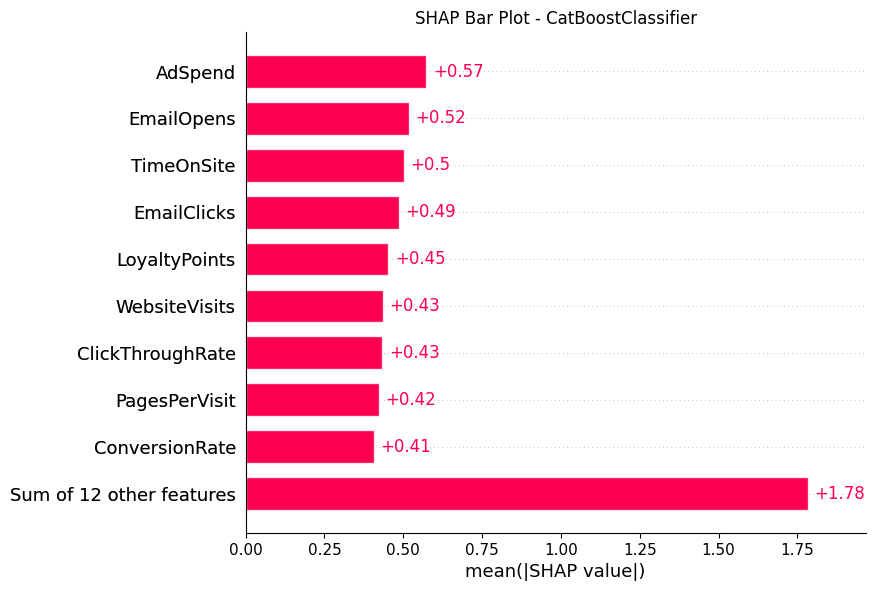

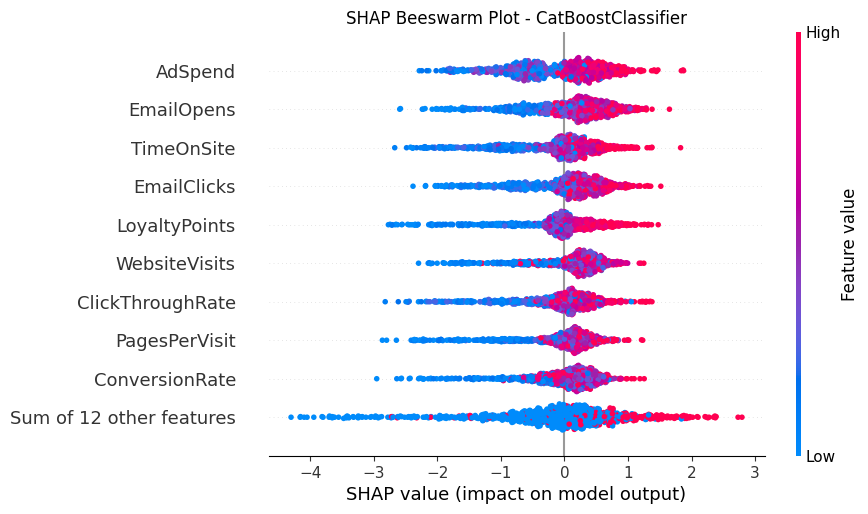

In [ ]:
for i, (model_name, model) in enumerate(best_models):

        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train[:1000])

        # Generate SHAP plots
        print(f"Model: {model_name}")

        # Waterfall plot for the first sample
        shap.plots.waterfall(shap_values[0], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 0)")
        plt.show()

        # Waterfall plot for the second sample
        shap.plots.waterfall(shap_values[1], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 1)")
        plt.show()

        # Bar plot for average SHAP values
        shap.plots.bar(shap_values, show=False)
        plt.title(f"SHAP Bar Plot - {model_name}")
        plt.show()

        # Beeswarm plot to visualize the distribution of SHAP values
        shap.plots.beeswarm(shap_values, show=False)
        plt.title(f"SHAP Beeswarm Plot - {model_name}")
        plt.show()

# **Model Evaluation**


* Algorithms are trained and tuned using best practices in machine learning.

* After training, the performance of these models are evaluated using metrics :
  * Confusion Matrix
  * Classification Report - Precision, Recall, F1 Score and Support
  * ROC Curve and ROC AUC Score

* Evaluating the model after Feature Importance

* Hyperparameter Tuning

* Final Deployment Model

### **Confusion Matrix**

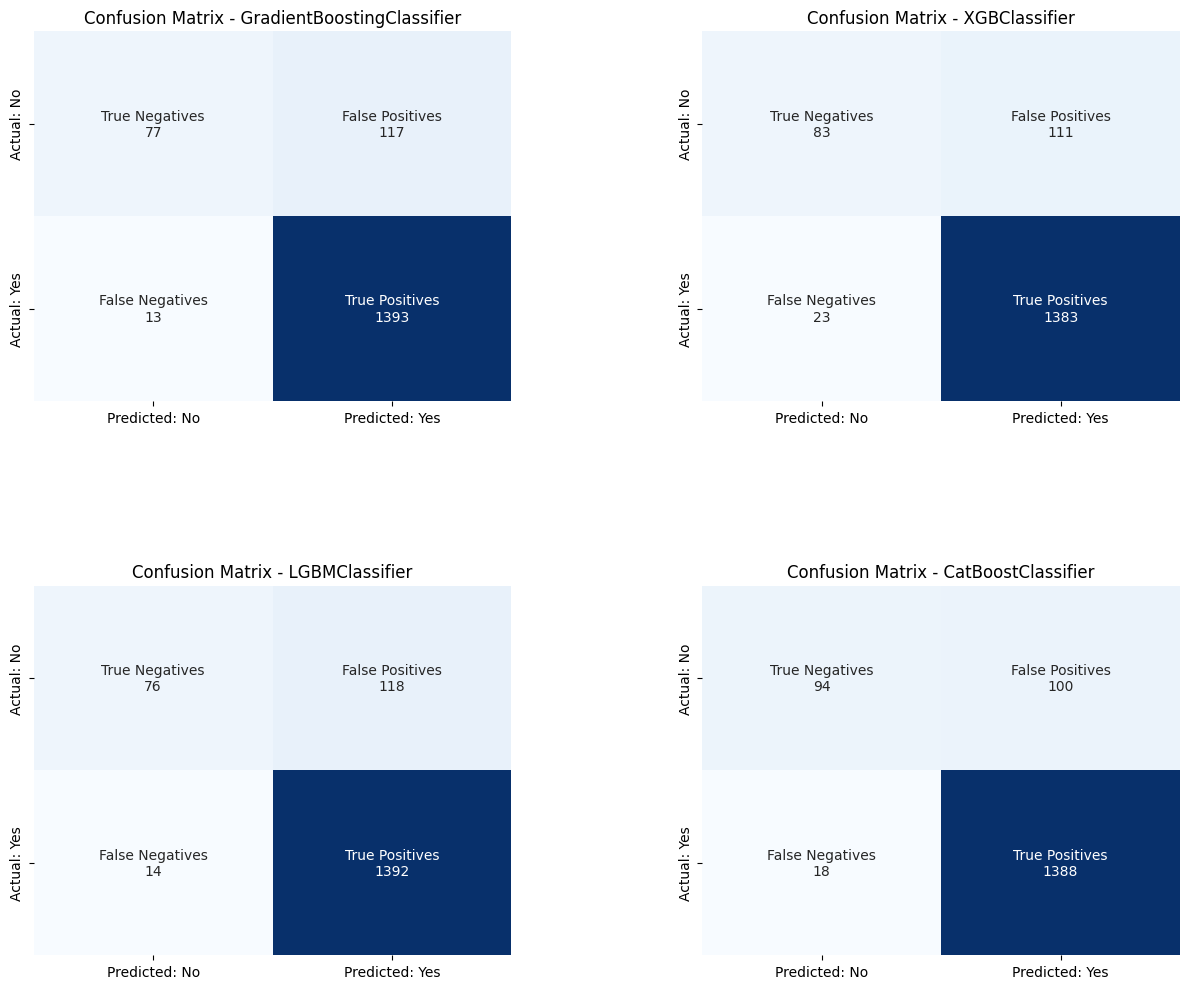

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(best_models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    group_names = ['True Negatives','False Positives','False Negatives','True Positives']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, annot=labels, fmt='', cmap="Blues", cbar=False,
                xticklabels=["Predicted: No", "Predicted: Yes"],
                yticklabels=["Actual: No", "Actual: Yes"], ax=axes[i])

    axes[i].set_title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

Based on the provided confusion matrices for the different classifiers, here is a breakdown for each model:

**Model: GradientBoostingClassifier**

The confusion matrix illustrates the performance of the GradientBoostingClassifier in classifying customer conversions. Here is a breakdown:

- **True Positives (Bottom-right: 1393):** The model correctly identifies 1,393 converted customers. This high count indicates the model's effectiveness in predicting actual converters, contributing to a high recall for the converted class.
- **True Negatives (Top-left: 77):** The model correctly identifies 77 customers who did not convert. While this number is smaller than true positives, it shows the model's ability to classify some non-converters correctly.
- **False Positives (Top-right: 117):** The model incorrectly predicts that 117 customers converted when they did not. This represents a relatively high Type I Error, suggesting the model sometimes incorrectly identifies non-converting customers as converters.
- **False Negatives (Bottom-left: 13):** The model incorrectly predicts that 13 customers did not convert when, in fact, they did. This Type II Error is very low, indicating that the model rarely misses actual converters.

**Model: XGBClassifier**

The confusion matrix for the XGBClassifier shows its classification performance:

- **True Positives (Bottom-right: 1383):** The model correctly identifies 1,383 converted customers, showcasing strong predictive power for identifying actual converters.
- **True Negatives (Top-left: 83):** The model correctly identifies 83 customers who did not convert, indicating some ability to classify non-converters correctly.
- **False Positives (Top-right: 111):** The model incorrectly predicts that 111 customers converted when they did not. This suggests a moderate Type I Error, showing difficulty in accurately predicting non-converters.
- **False Negatives (Bottom-left: 23):** The model incorrectly predicts that 23 customers did not convert when they actually did. This Low and favourable Type II Error indicates good model sensitivity to actual converters.

**Model: LGBMClassifier**

The confusion matrix illustrates the performance of the LGBMClassifier in classifying customer conversions:

- **True Positives (Bottom-right: 1392):** The model correctly identifies 1,392 converted customers. This high number indicates strong performance in predicting actual converters.
- **True Negatives (Top-left: 76):** The model correctly identifies 76 customers who did not convert. Although this number is smaller than true positives, it reflects the model's capacity to identify some non-converters accurately.
- **False Positives (Top-right: 118):** The model incorrectly predicts that 118 customers converted when they did not. This higher Type I Error suggests that the model must identify non-converting customers.
- **False Negatives (Bottom-left: 14):** The model incorrectly predicts that 14 customers did not convert when, in fact, they did. This low Type II Error indicates that the model rarely misclassifies actual converters as non-converters.

**Model: CatBoostClassifier**

The confusion matrix for the CatBoostClassifier provides insights into its performance:

- **True Positives (Bottom-right: 1388):** The model correctly identifies 1,388 converted customers, reflecting robust predictive capability for actual converters.
- **True Negatives (Top-left: 94):** The model correctly identifies 94 customers who did not convert. This is a relatively higher number of true negatives than other models, indicating a better performance in identifying non-converters.
- **False Positives (Top-right: 100):** The model incorrectly predicts that 100 customers converted when they did not. This Type I Error is lower than other models, suggesting better accuracy in predicting non-conversions.
- **False Negatives (Bottom-left: 18):** The model incorrectly predicts that 18 customers did not convert when they actually did. This moderate Type II Error shows that the model occasionally misses some converters but performs reasonably well overall.


### **Classification Report**

In [ ]:
weighted_avg_metrics = {}

# Evaluate each model
for i, (name, model) in enumerate(best_models):

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test), output_dict=True, digits=6) # Added digits parameter

    # Extract weighted average metrics
    weighted_avg_metrics[name] = report['weighted avg']

    report_df = pd.DataFrame(report).transpose()

    print()
    print(f"Classification Report: {name}")
    print("-" * (25 + len(name)))
    display(report_df.style.background_gradient(cmap='Blues'))
    print()

    print("=======================================")


Classification Report: GradientBoostingClassifier
---------------------------------------------------




Classification Report: XGBClassifier
--------------------------------------




Classification Report: LGBMClassifier
---------------------------------------




Classification Report: CatBoostClassifier
-------------------------------------------


**Model: GradientBoostingClassifier**

- **Accuracy:** 0.9188 (Training and Testing)
- **Key Observations:**
  - The GradientBoostingClassifier shows high performance for predicting class 1 (converted), with a precision of 0.9225 and recall of 0.9908, resulting in an impressive F1-score of 0.9554.
  - However, it struggles with class 0 (non-converted), reflected in a lower recall of 0.3969, indicating difficulty identifying non-converting customers. The precision for class 0 is 0.8556, and the F1-score is 0.5423, showing a significant imbalance between the classes.
  - The **macro average** F1-score of 0.7488 and **weighted average** F1-score of 0.9053 highlight a reasonable overall performance but suggest room for improvement in predicting non-conversions.

**Model: XGBClassifier**

- **Accuracy:** 0.9163 (Training and Testing)
- **Key Observations:**
  - XGBClassifier performs robustly with a high precision of 0.9257 and recall of 0.9836 for class 1 (converted), leading to an F1-score of 0.9538, demonstrating its strength in identifying converting customers.
  - The model exhibits lower performance for class 0 (non-converted) with a precision of 0.7830 and a recall of 0.4278, resulting in an F1-score of 0.5533. This indicates a higher false positive rate when predicting non-conversions.
  - The **macro average** F1-score of 0.7536 and **weighted average** F1-score of 0.9052 suggest a balanced model, although it slightly underperforms compared to the CatBoostClassifier.

**Model: LGBMClassifier**

- **Accuracy:** 0.9175 (Training and Testing)
- **Key Observations:**
  - LGBMClassifier shows a strong performance for predicting class 1 (converted) with a precision of 0.9219 and a high recall of 0.9900, resulting in an F1-score of 0.9547.
  - The model's performance for class 0 (non-converted) is lower, with a precision of 0.8444 and a recall of 0.3918, leading to an F1-score of 0.5352. This reflects a similar challenge to GradientBoostingClassifier in predicting non-conversions.
  - The **macro average** F1-score of 0.7448 and **weighted average** F1-score of 0.9039 indicate that while the model performs well overall, it has a noticeable gap in handling non-converted predictions effectively.

**Model: CatBoostClassifier**

- **Accuracy:** 0.9263 (Training and Testing)
- **Key Observations:**
  - CatBoostClassifier provides the best balance, achieving a precision of 0.9328 and recall of 0.9872 for class 1 (converted), with an F1-score of 0.9592, indicating excellent performance in predicting conversions.
  - It also shows relatively better performance in class 0 (non-converted) with a precision of 0.8393 and recall of 0.4845, resulting in an F1-score of 0.6144, outperforming the other models in handling non-conversions.
  - The **macro average** F1-score of 0.7868 and **weighted average** F1-score of 0.9174 signify the CatBoostClassifier's superior capability in balancing precision and recall across both classes.

**Conclusion:**

- **Top Performers:** CatBoostClassifier stands out as the best model with the highest accuracy and balanced performance across both classes, making it ideal for scenarios where both precision and recall are critical.
- **Areas for Improvement:** The GradientBoostingClassifier, XGBClassifier, and LGBMClassifier perform well but have difficulty predicting non-converted customers (class 0). Further fine-tuning or feature engineering could improve their overall effectiveness.

### **ROC Curves**

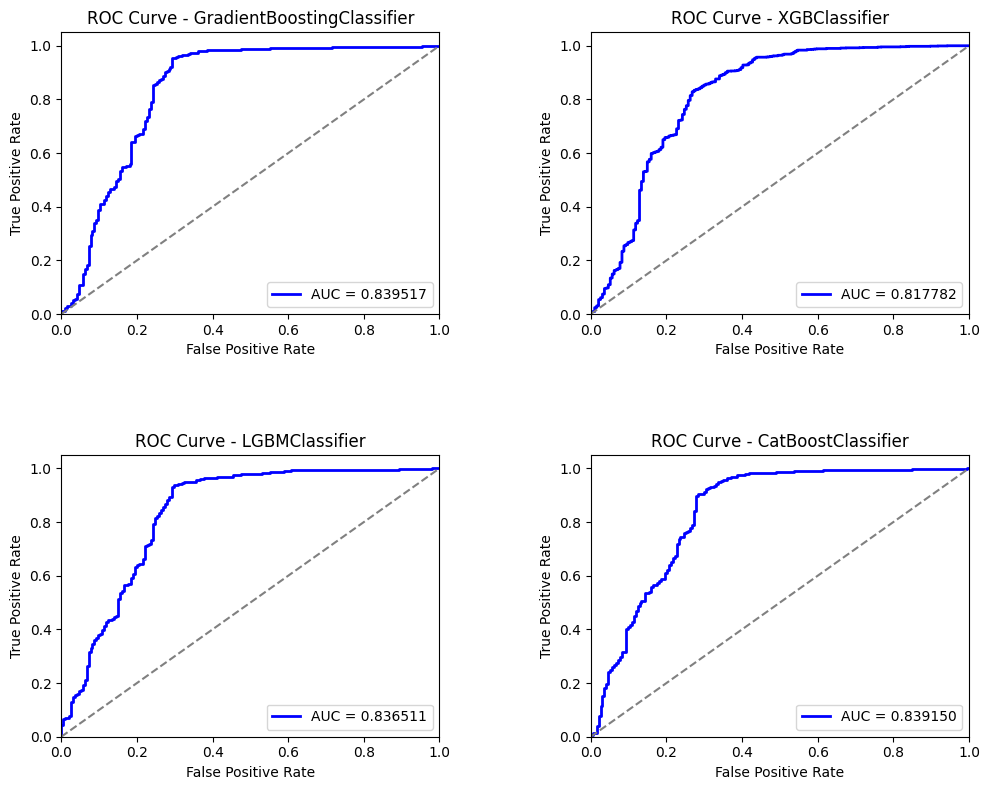

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

auc_values = []

# Evaluate each model
for i, (name, model) in enumerate(best_models):

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)

    auc_values.append({'Model': name, 'AUC': f'{auc:.6f}'})

    # Plot the ROC curve on the corresponding subplot
    axes[i].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.6f}')
    axes[i].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - {name}')
    axes[i].legend(loc="lower right")
    axes[i].grid(False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

The Receiver Operating Characteristic (ROC) curves for the models provide insight into their performance in distinguishing between the two classes (conversion vs. non-conversion). The Area Under the Curve (AUC) is a critical metric that summarizes the overall performance of each model. Here is the refined analysis based on the uploaded ROC curves:

**Model: GradientBoostingClassifier**

- **AUC = 0.8395**
- The Gradient Boosting Classifier shows strong performance with an AUC of 0.8395. The ROC curve is close to the top-left corner, indicating that the model effectively balances sensitivity (true positive rate) and specificity (false positive rate). This suggests the model is highly capable of distinguishing between customers who will convert and those who will not.

**Model: XGBoost Classifier**
- **AUC = 0.8178**
- The XGBoost Classifier also demonstrates good performance with an AUC of 0.8178. The curve suggests that XGBoost is an effective model for this task, capable of distinguishing between the two classes with high accuracy. The model maintains a reasonable balance between true positives and false positives, making it a reliable choice for predicting customer conversions.

**Model: LGBMClassifier**
- **AUC = 0.8365**
- The LightGBM Classifier shows strong performance with an AUC of 0.8365. Similar to the Gradient Boosting model, LightGBM demonstrates excellent discriminatory power, effectively distinguishing between converting and non-converting customers. The curve's proximity to the top-left corner highlights its robustness in classification tasks.

**Model: CatBoostClassifier**
- **AUC = 0.8391**
- The CatBoost Classifier exhibits excellent performance, with an AUC of 0.8391. The ROC curve is close to the ideal top-left corner, indicating that this model has a high true positive rate while maintaining a low false positive rate. This makes CatBoost one of the top-performing models, particularly well-suited for scenarios where the distinction between classes is crucial.

**Conclusion:**
- **GradientBoostingClassifier, LGBMClassifier, and CatBoostClassifier** all show high AUC scores above 0.83, indicating they are the best performers in terms of predictive power and are highly effective for distinguishing between conversion and non-conversion classes.
- **XGBClassifier** also performs well, with an AUC above 0.81, making it a strong candidate for predictive tasks.

**Recommendation:**
- Given the AUC scores, **ensemble models** like Gradient Boosting, LightGBM, XGBoost, and CatBoost are recommended for further development and deployment. These models provide the best balance between sensitivity and specificity, ensuring high accuracy in predicting customer conversion outcomes.

### **Final Deployment Model**

In [ ]:
weighted_avg_df = pd.DataFrame(weighted_avg_metrics).transpose().reset_index(names='Model')

accuracy_df = accuracy_df[accuracy_df['Model'].isin(weighted_avg_df['Model'])]
accuracy_df = accuracy_df[['Model', 'Testing Accuracy']]

for col in ['precision', 'recall', 'f1-score', 'support']:
        weighted_avg_df[col] = weighted_avg_df[col].map('{:.6f}'.format)

auc_df = pd.DataFrame(auc_values)

metrics_df = weighted_avg_df.join(auc_df.set_index('Model'), on='Model')
metrics_df = metrics_df.join(accuracy_df.set_index('Model'), on='Model')

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

metrics_df = metrics_df.sort_values(by='Testing Accuracy', ascending=False)
metrics_df = metrics_df.style.apply(highlight_max, subset=['precision', 'recall', 'f1-score', 'AUC', 'Testing Accuracy'], axis=0) # Include 'Testing Accuracy' in the subset
metrics_df

**Model: CatBoostClassifier**

* Based on the model evaluation metrics, the CatBoost Classifier emerged as the best-performing model, achieving the highest testing accuracy of 92.63% and an F1-score of 0.9174.
* This model outperformed others, including Gradient Boosting, LGBM, and XGBoost classifiers, due to its superior precision (0.9215) and recall (0.9263).
* The CatBoost model's AUC score of 0.8391 indicates its strong ability to distinguish between classes, making it highly reliable for predicting customer conversions in digital marketing campaigns.
* While Gradient Boosting also showed competitive performance with an AUC of 0.8395 and testing accuracy of 91.88%, the CatBoost model's balanced metrics suggest it provides the most effective balance between sensitivity and specificity.
* Consequently, the CatBoost Classifier is recommended as the optimal model for deployment to enhance predictive accuracy and optimise marketing strategies.